In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer-dataset/dataset_med.csv


# DATA LOADING AND PREPROCESSING

In [2]:
df = pd.read_csv('/kaggle/input/lung-cancer-dataset/dataset_med.csv')
df

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [4]:
df.isna().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [5]:
df.describe(include='all')

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
count,890000.000000,890000.000000,890000,890000,890000,890000,890000,890000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000,890000,890000.000000
unique,NaN,NaN,2,27,3651,4,2,4,NaN,NaN,NaN,NaN,NaN,NaN,4,4194,NaN
top,NaN,NaN,Male,Malta,2024-05-15,Stage III,No,Passive Smoker,NaN,NaN,NaN,NaN,NaN,NaN,Chemotherapy,2023-12-09,NaN
freq,NaN,NaN,445134,33367,306,222594,445181,223170,NaN,NaN,NaN,NaN,NaN,NaN,223262,294,NaN
mean,445000.500000,55.007008,NaN,NaN,NaN,NaN,NaN,NaN,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,NaN,NaN,0.220229
std,256921.014128,9.994485,NaN,NaN,NaN,NaN,NaN,NaN,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,NaN,NaN,0.414401
min,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,222500.750000,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
50%,445000.500000,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
75%,667500.250000,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,0.000000


# VIZUALIZAION SECTION

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set_style('whitegrid')

In [8]:
cols = ['age', 'gender', 'country', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type','survived']

# HISTOGRAM PLOT

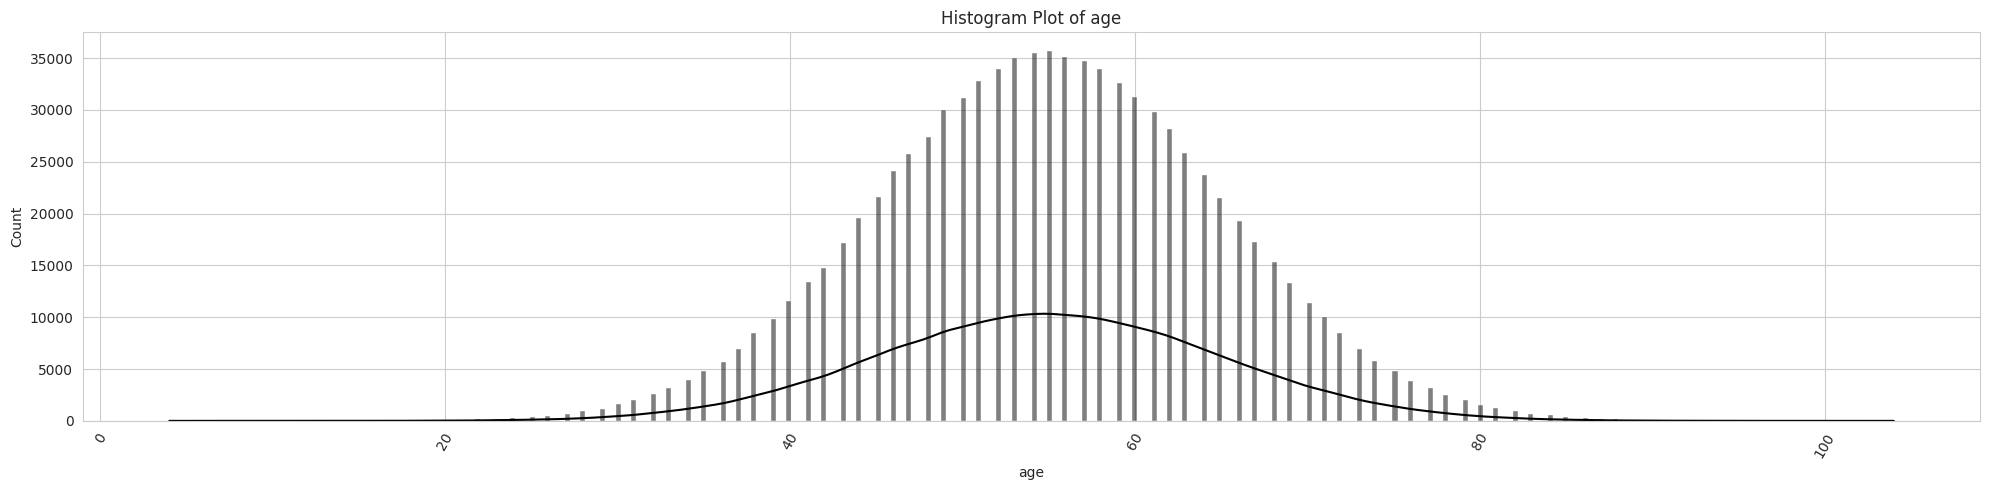

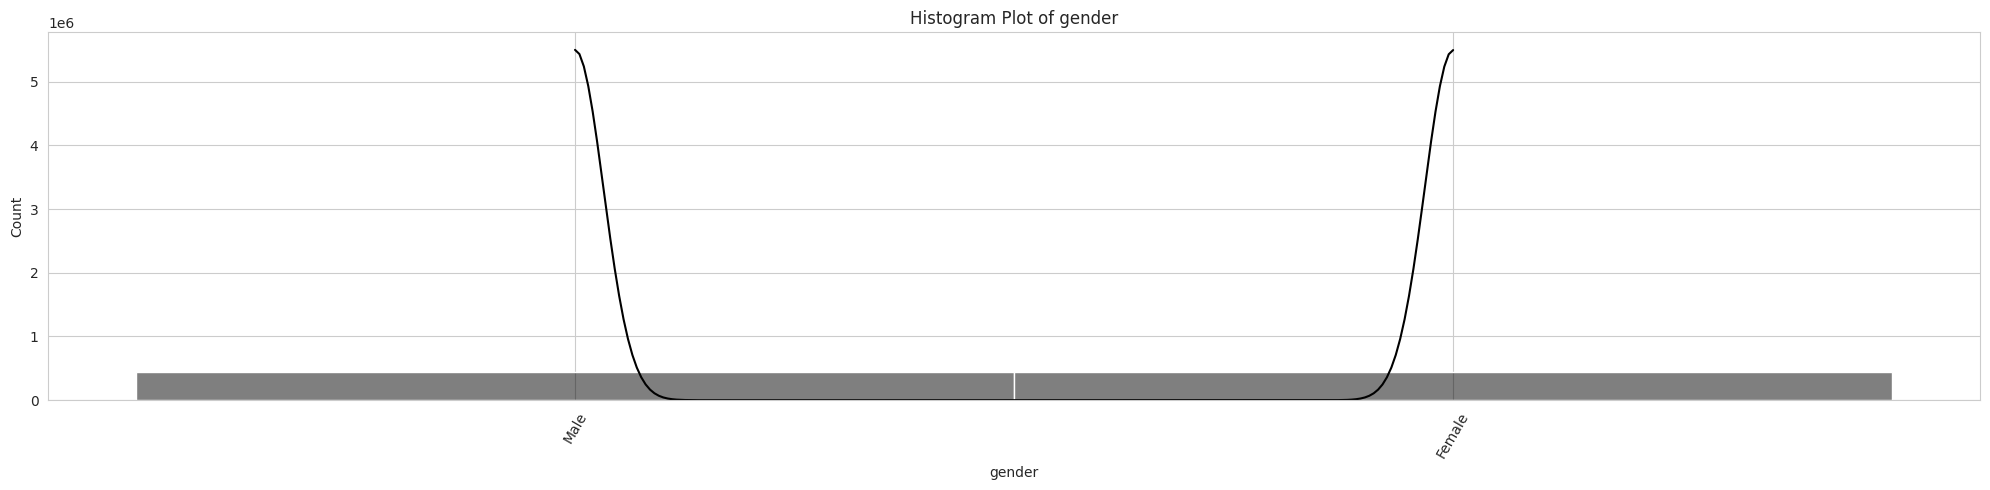

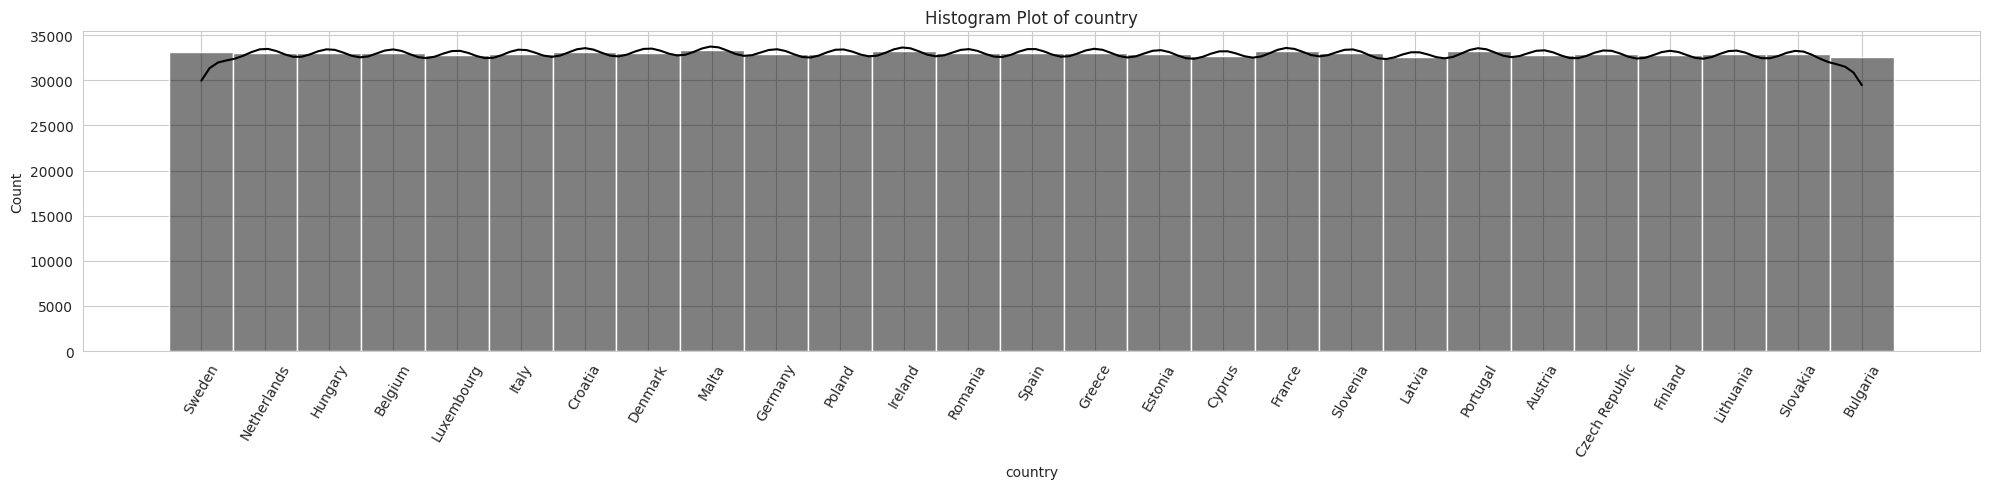

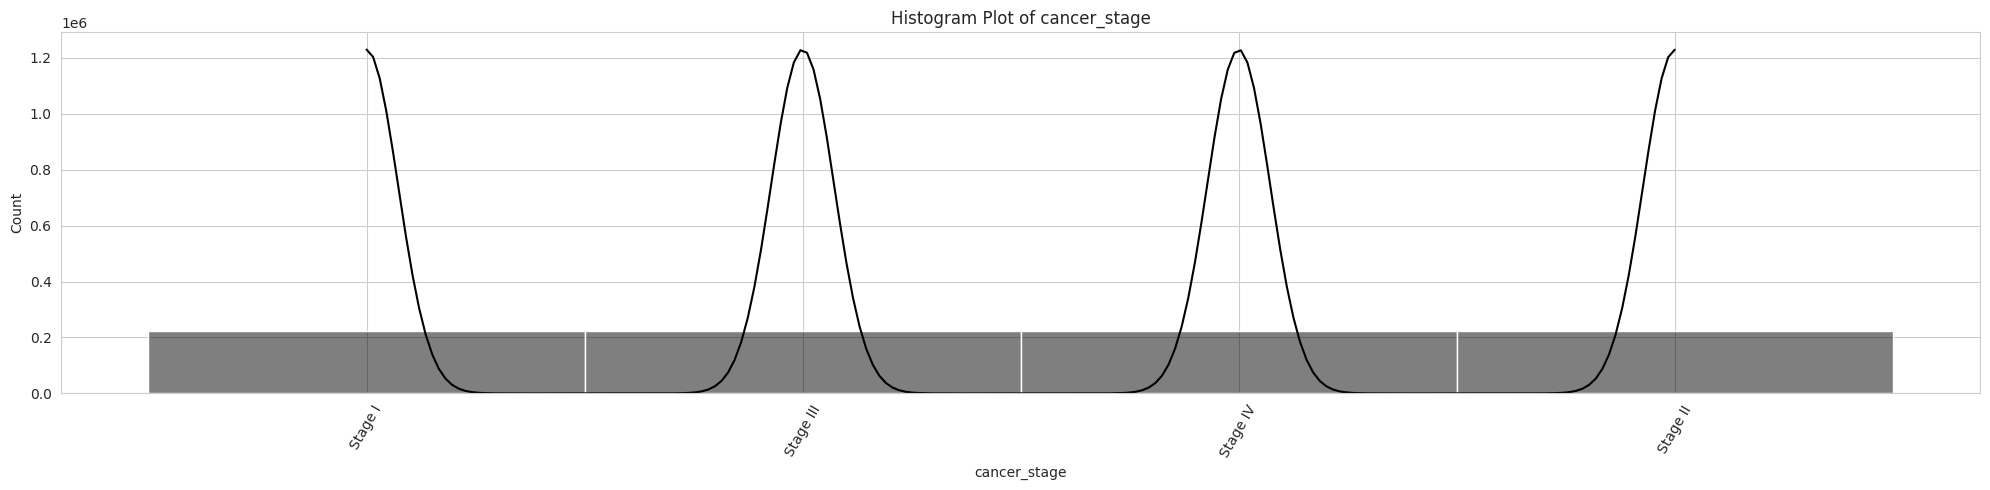

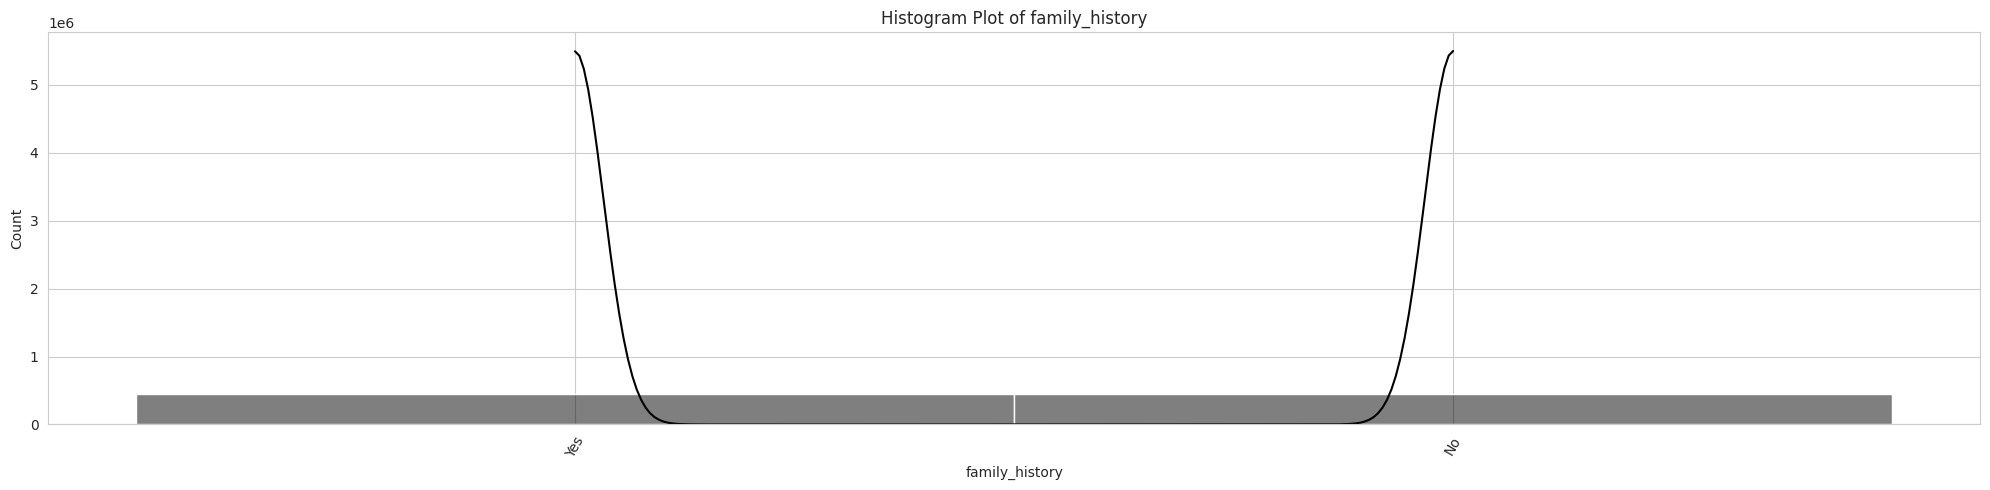

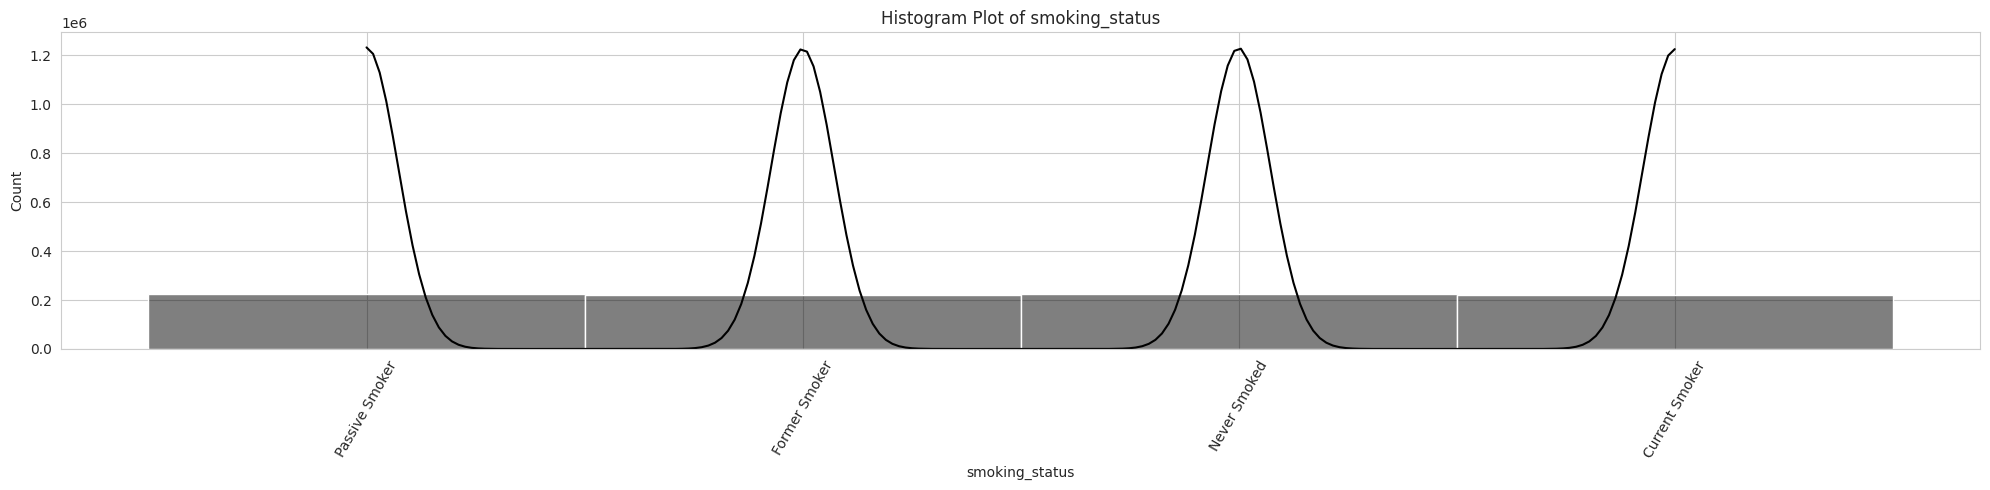

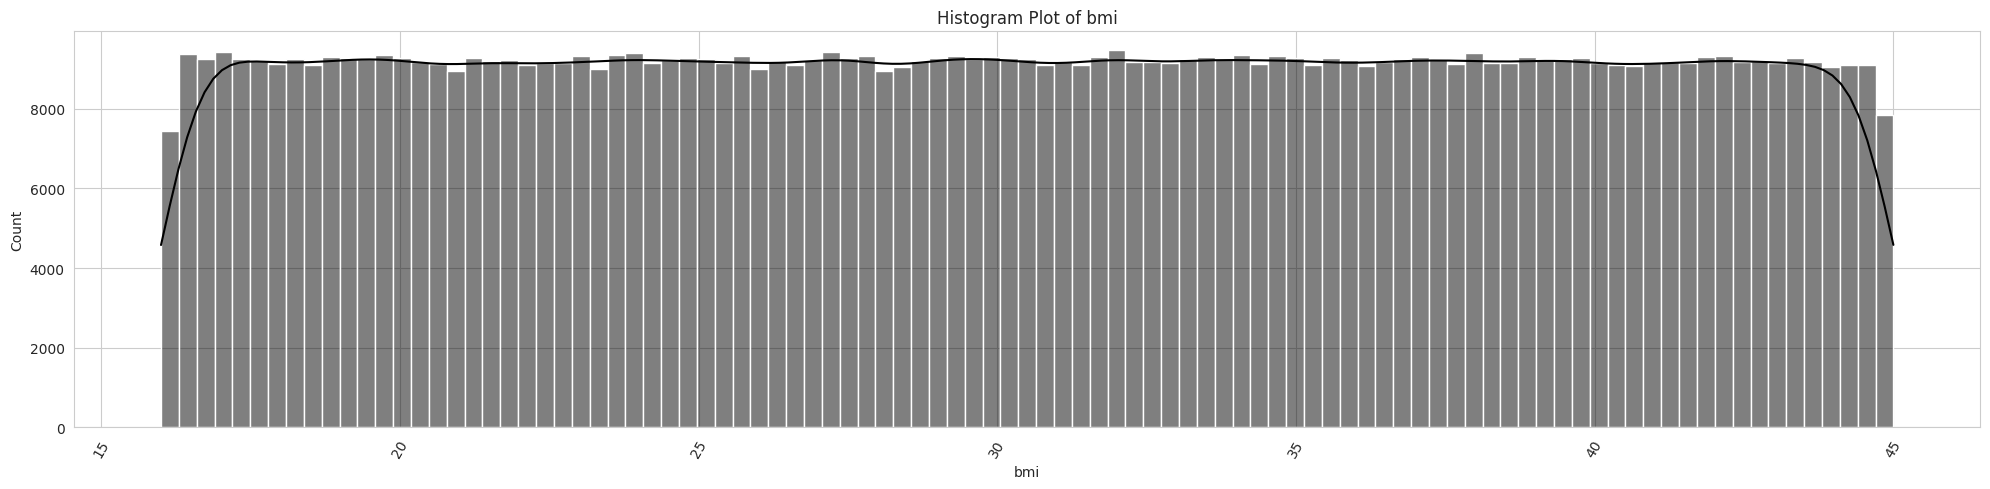

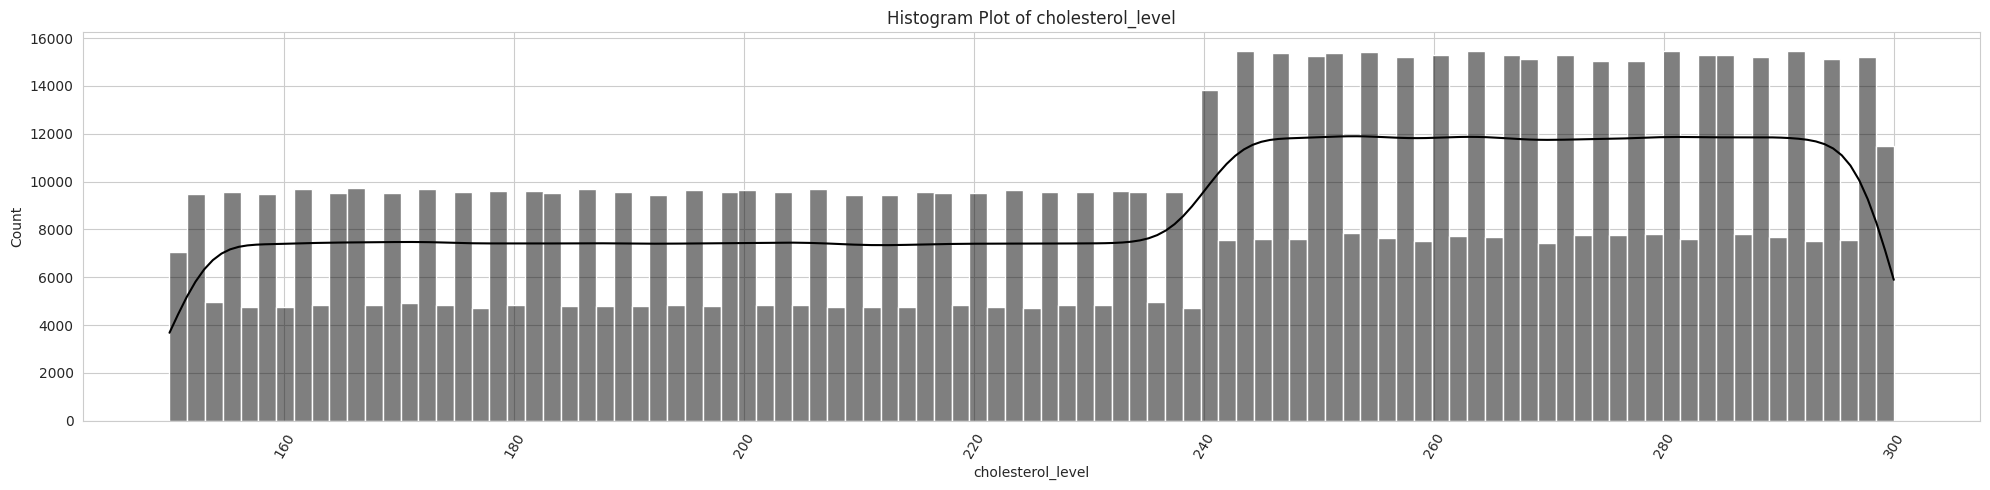

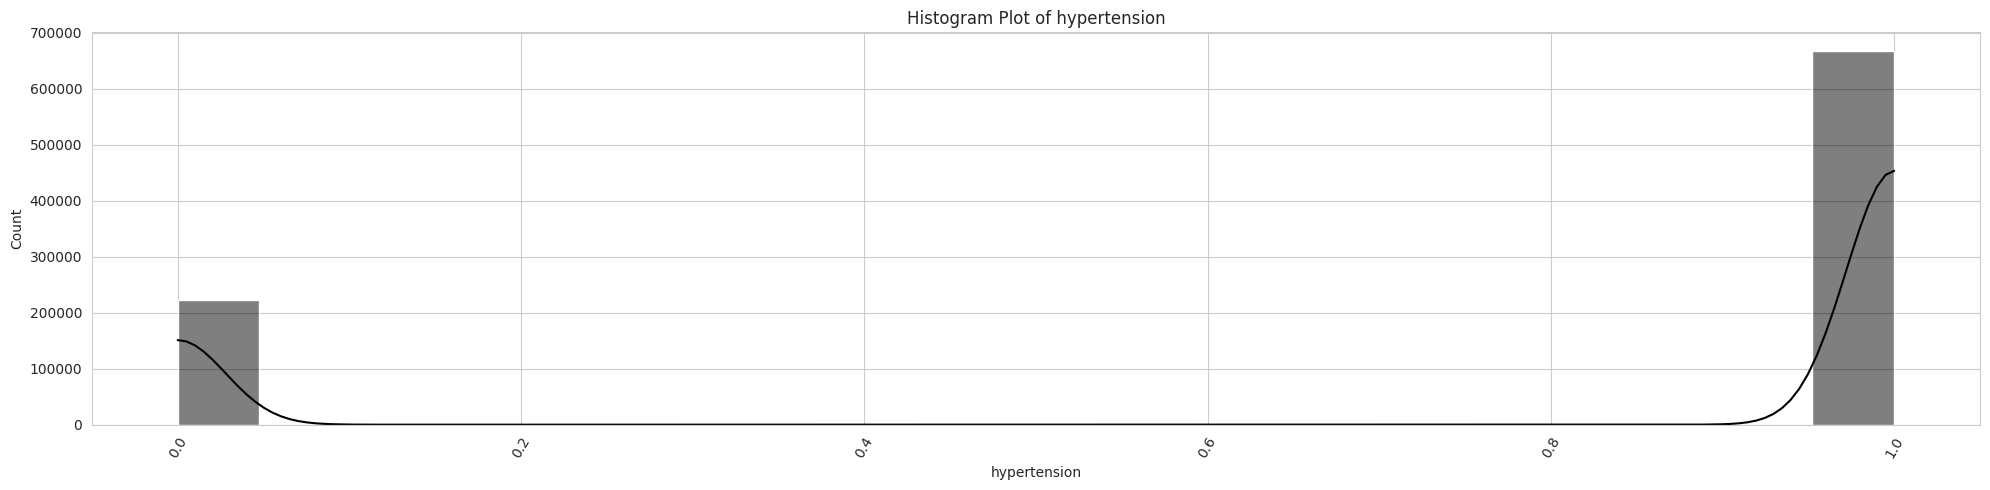

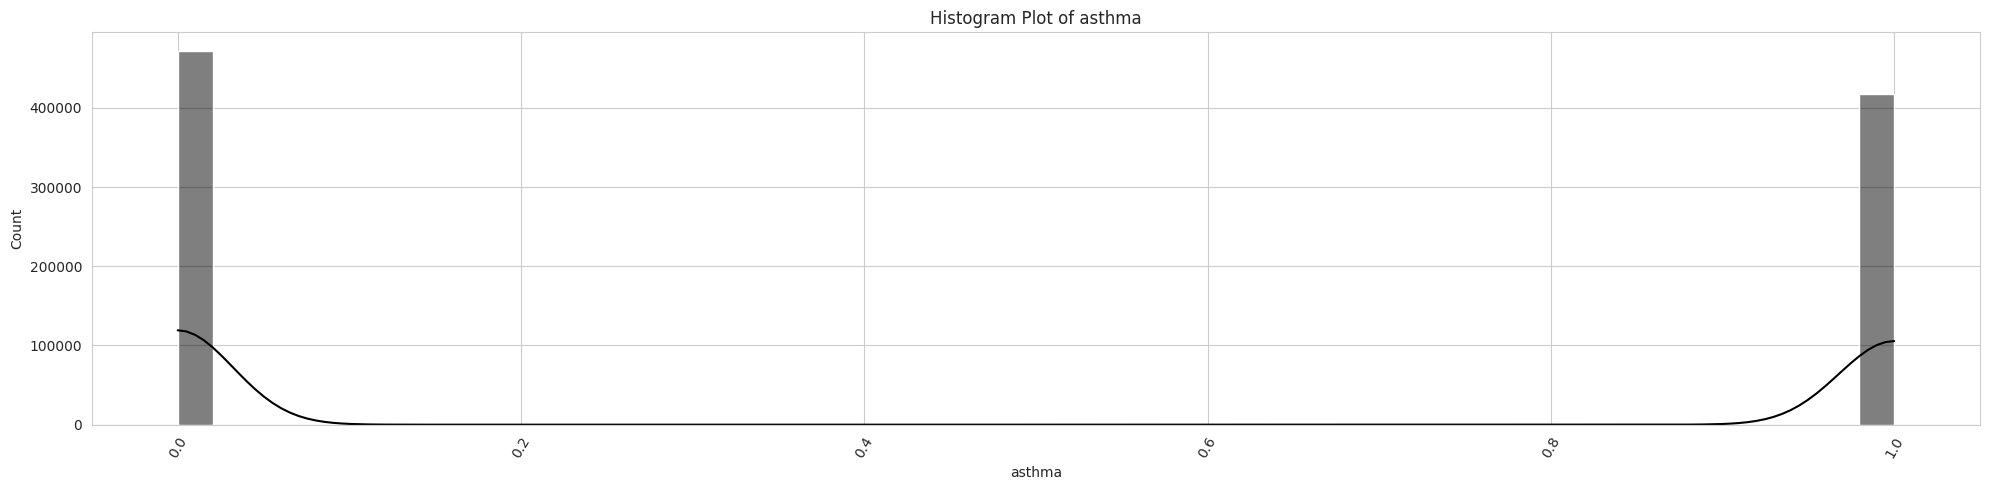

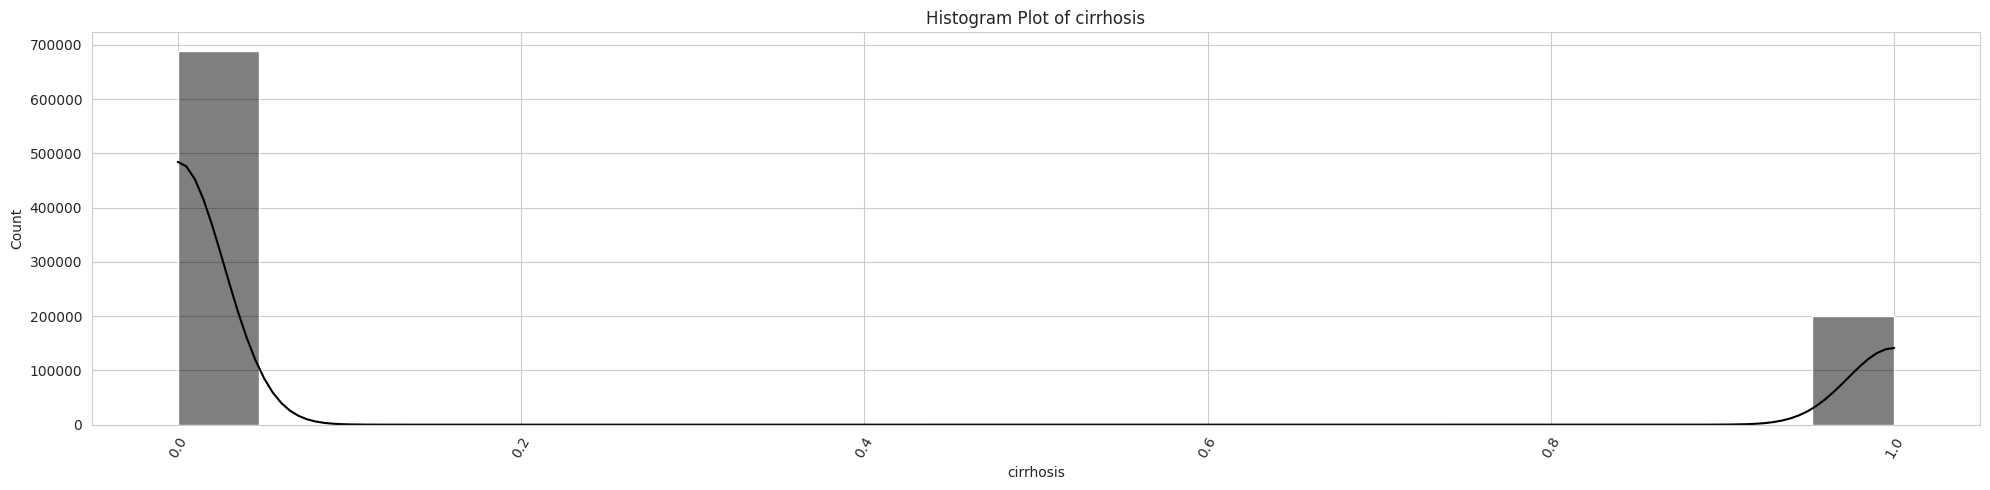

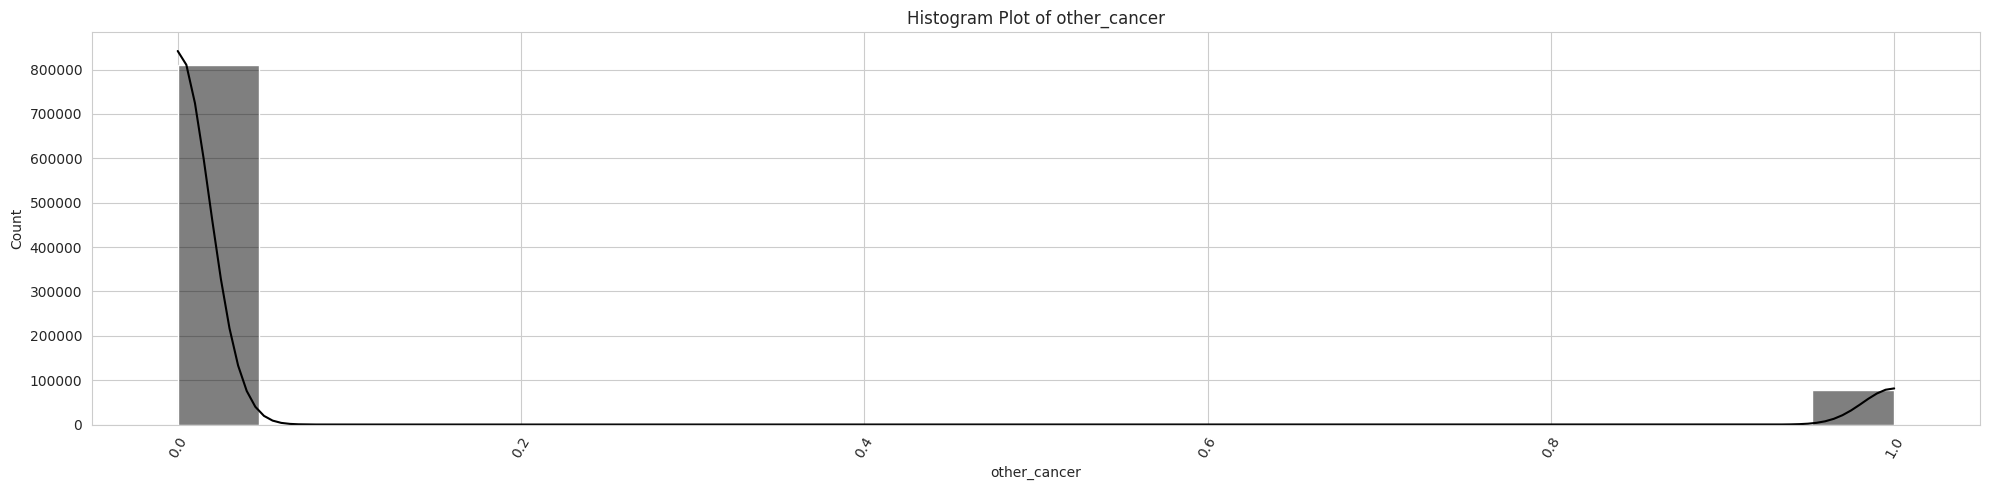

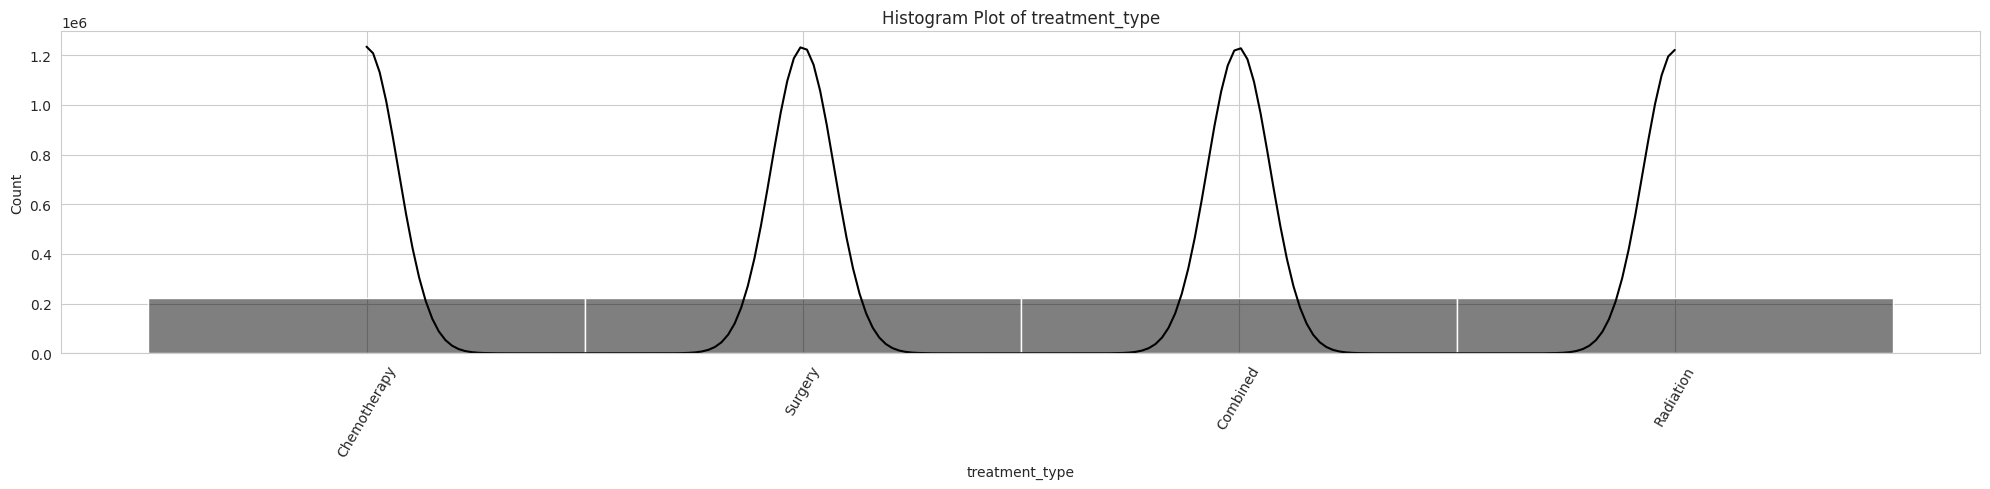

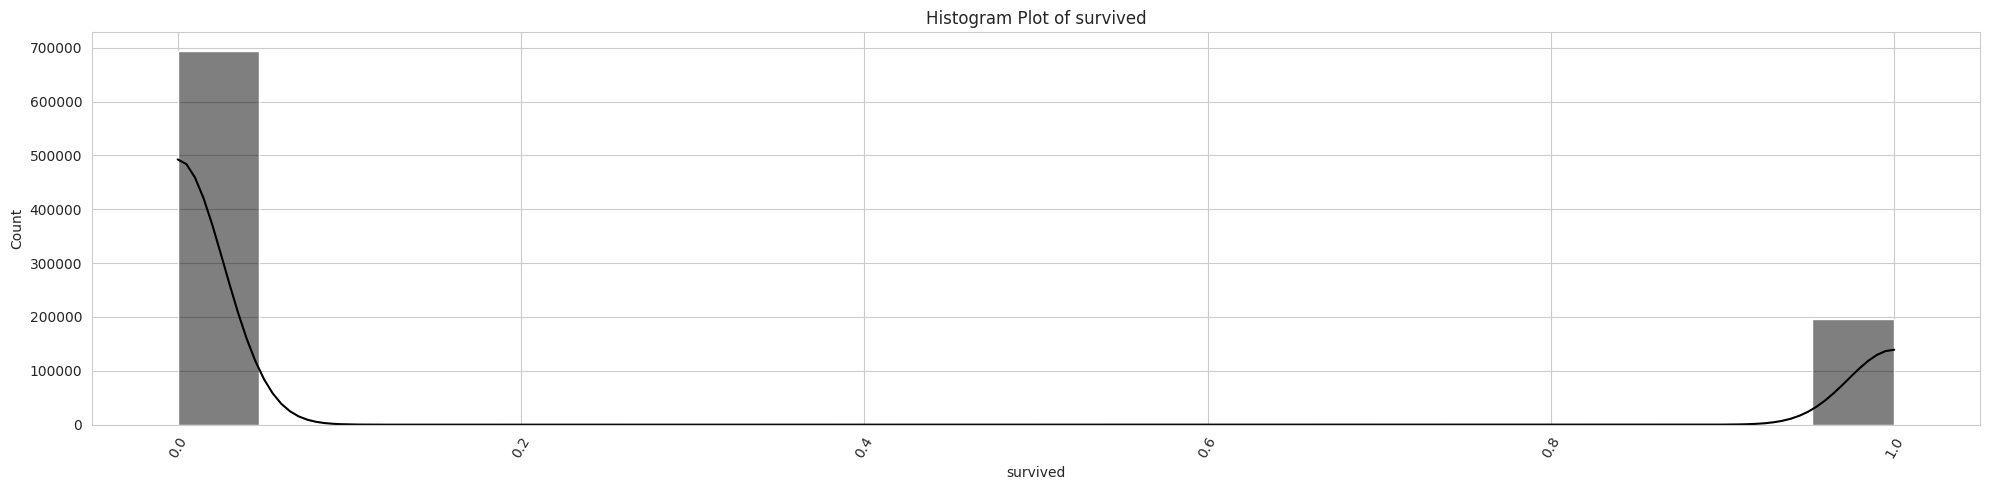

In [9]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(20,5))
        sns.histplot(df[features].dropna(),kde=True,color='black')
        plt.title(f'Histogram Plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.xticks(rotation=60)
        plt.tight_layout()
        plt.show()

# COUNT PLOT

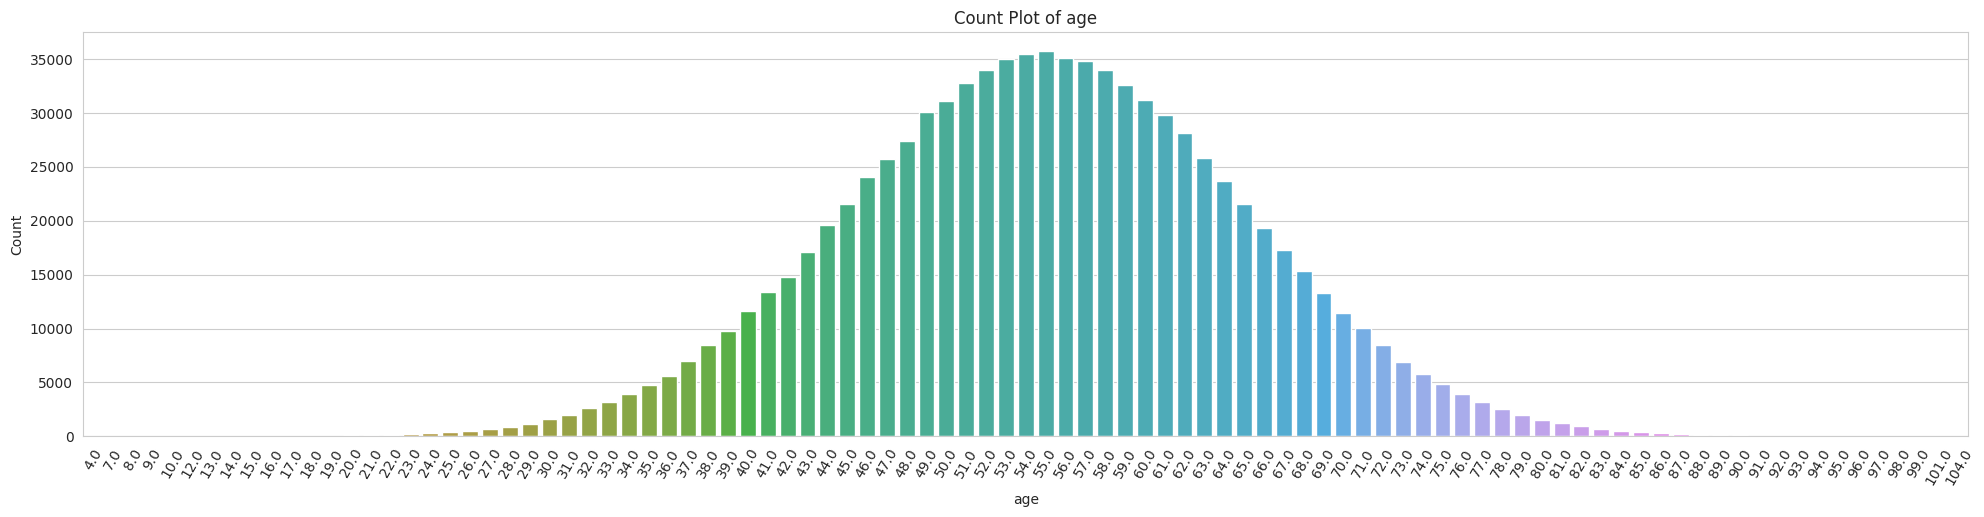

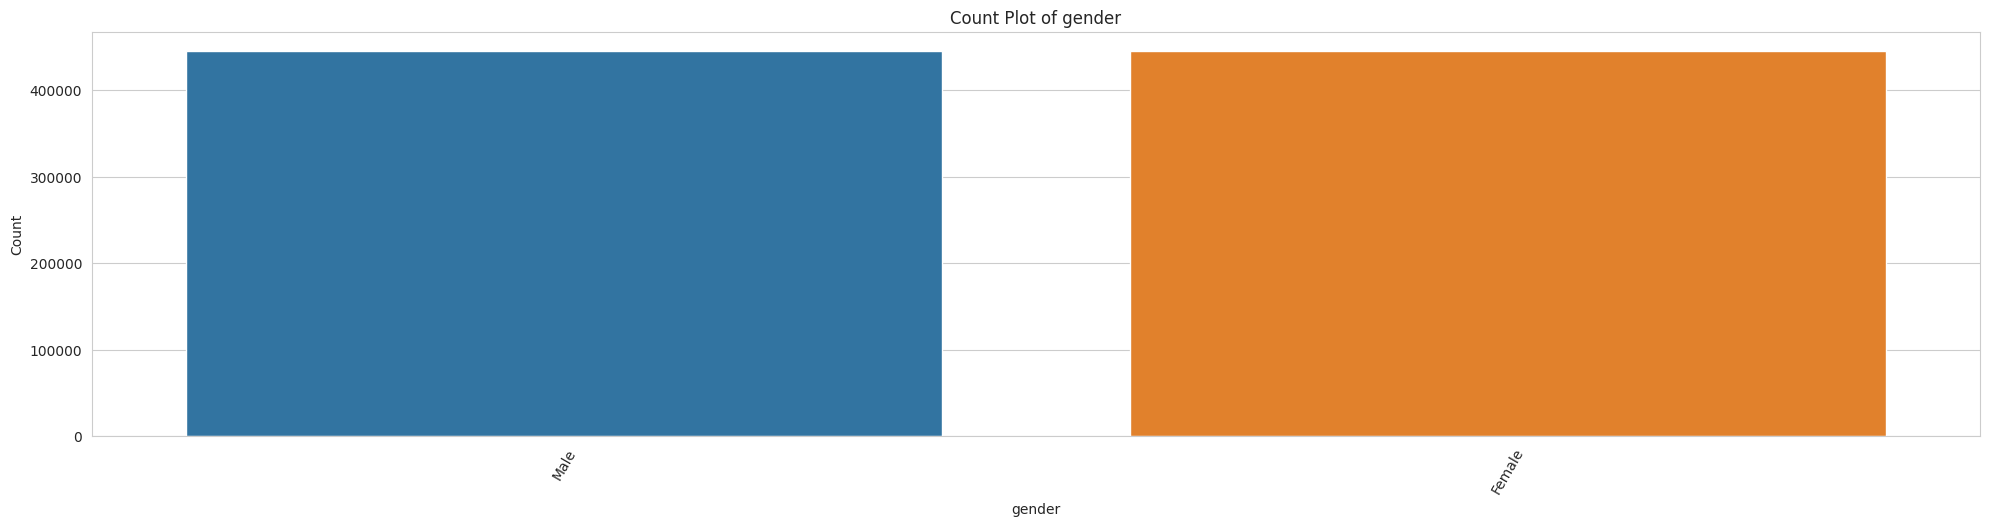

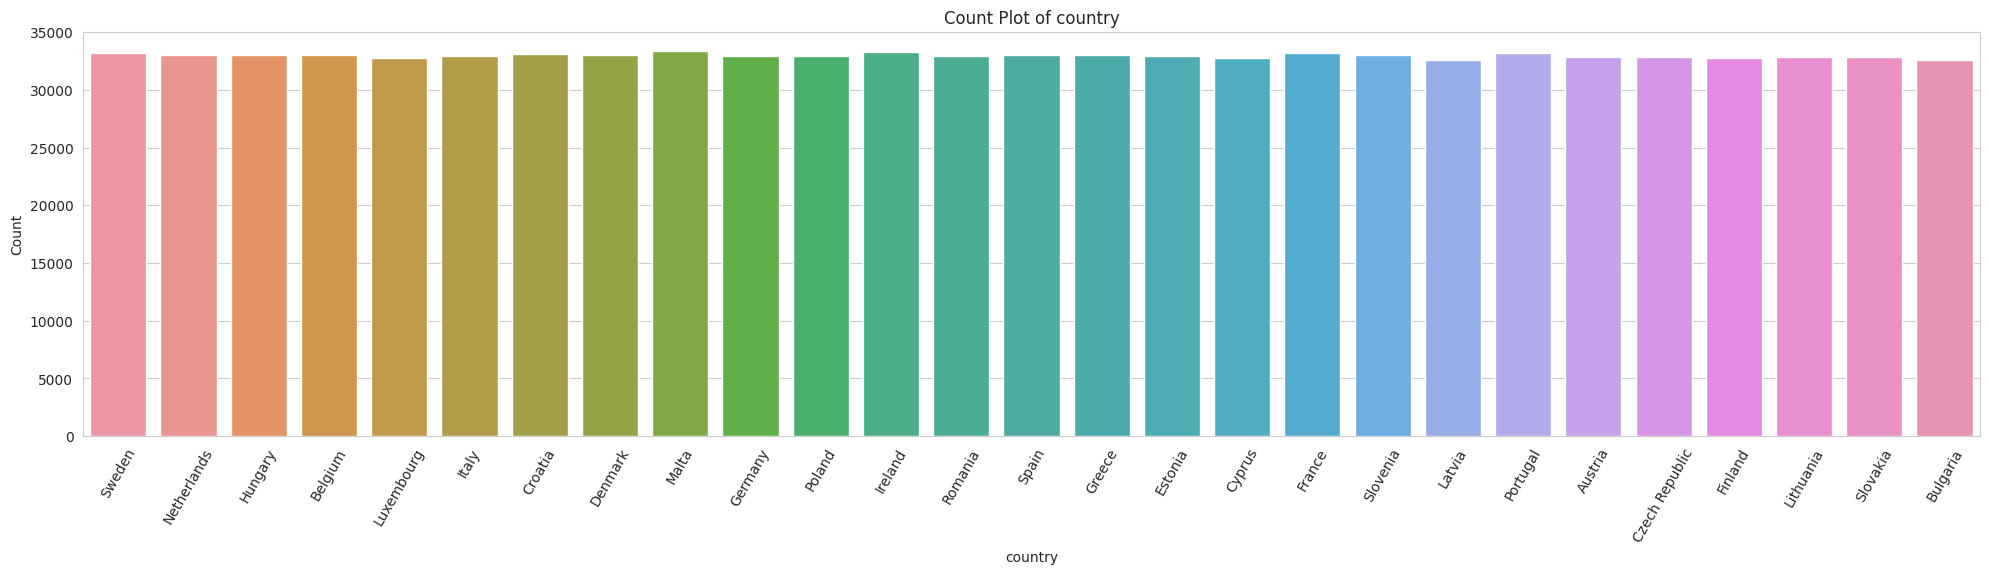

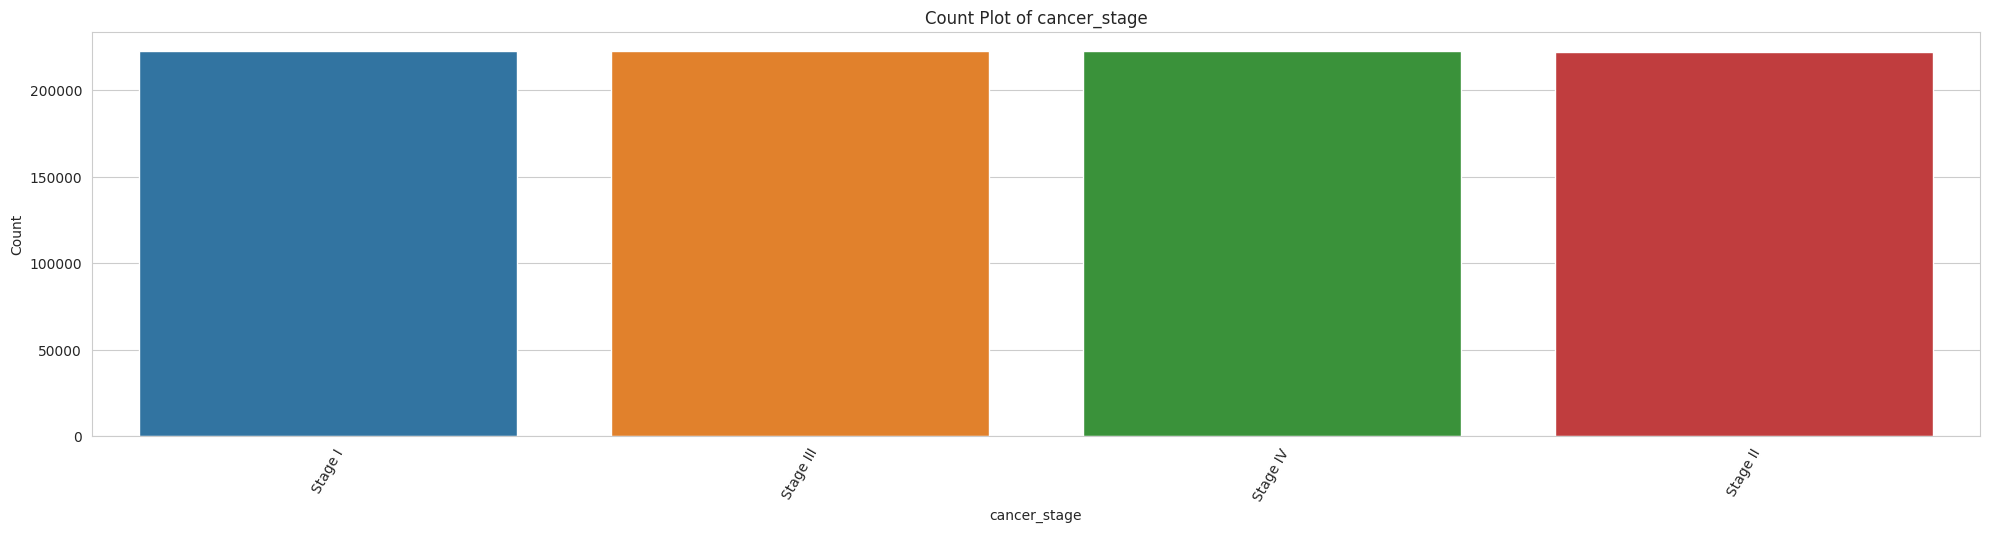

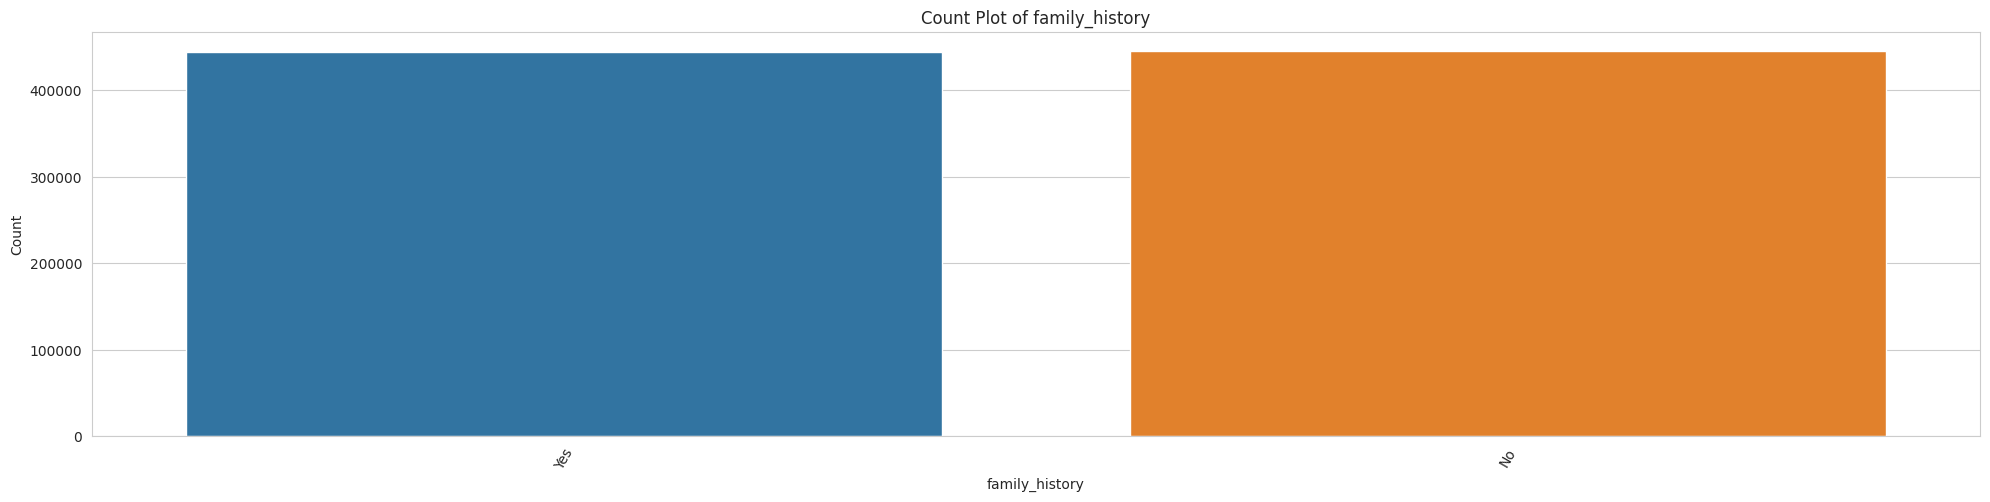

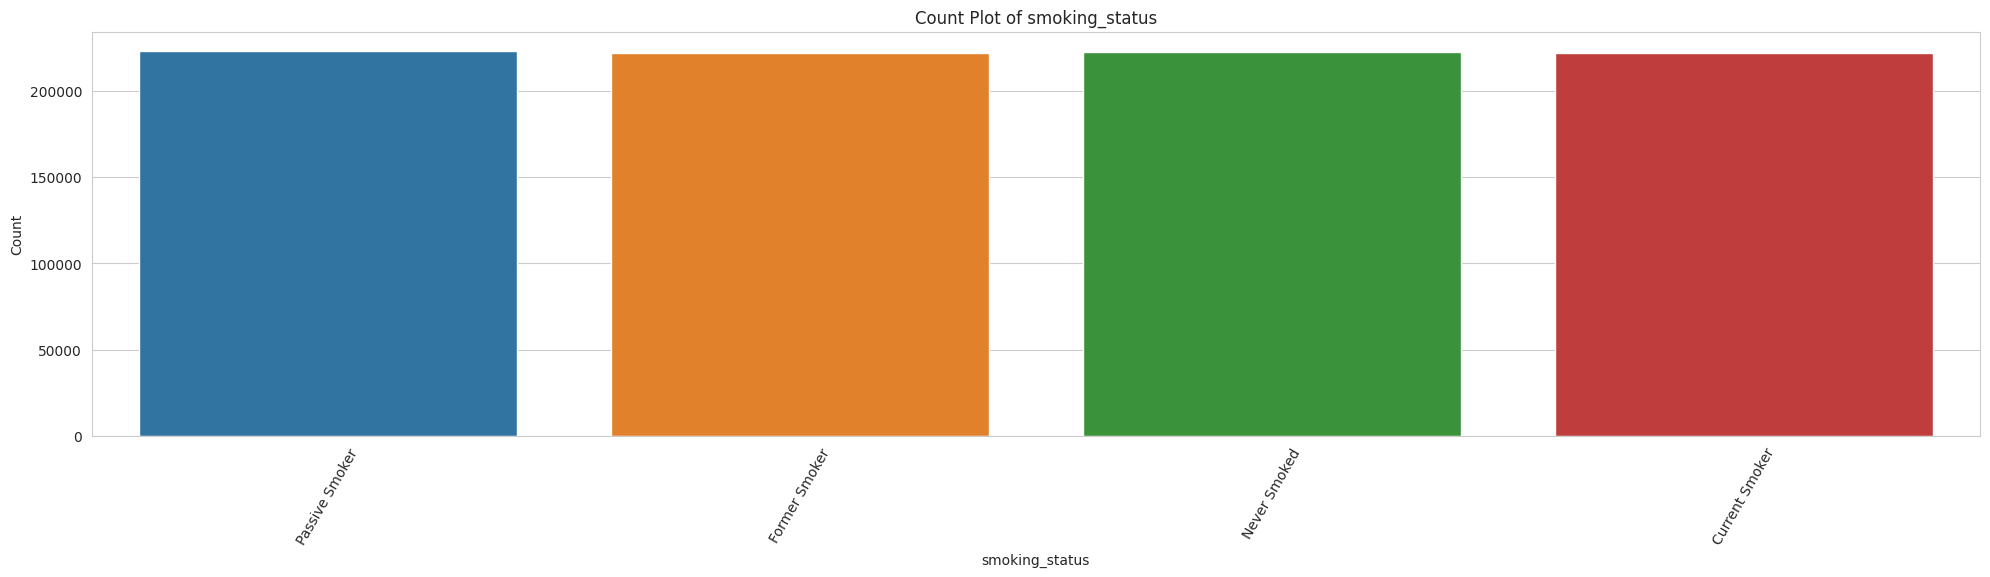

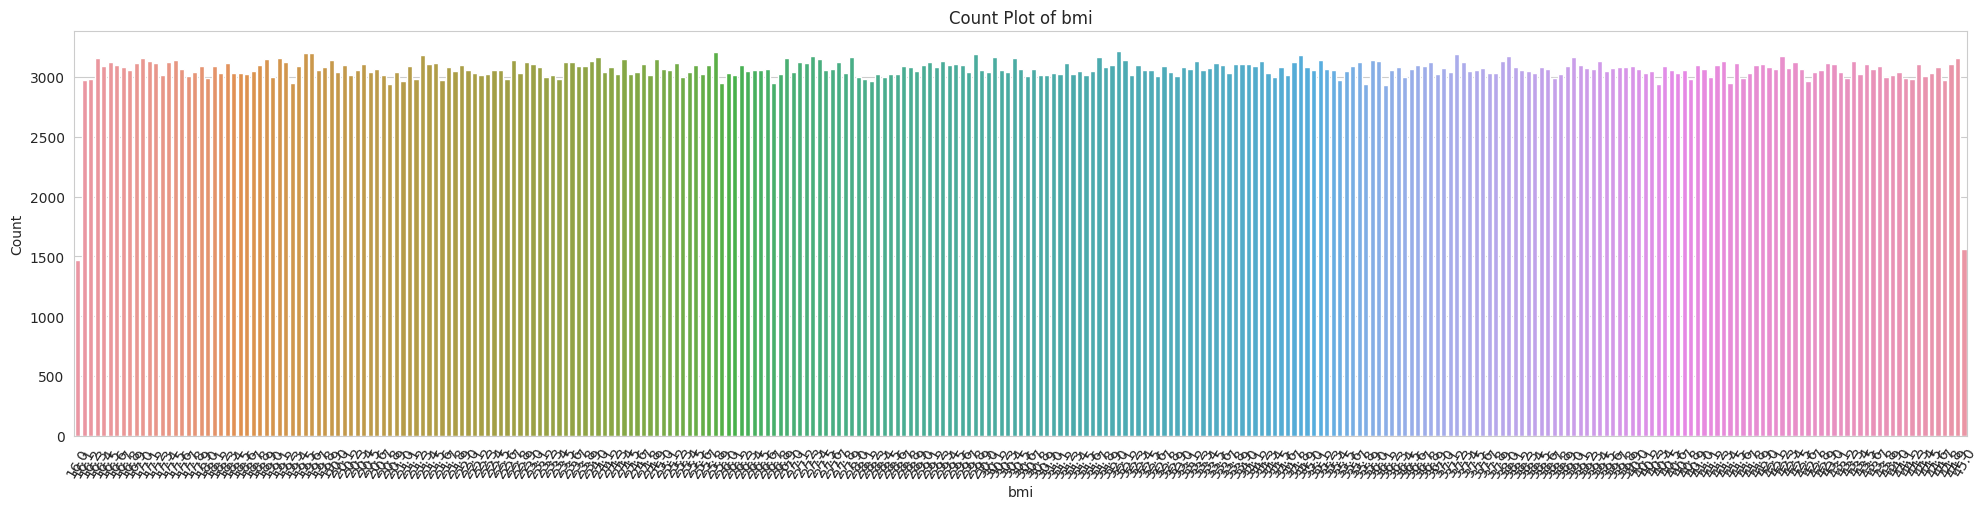

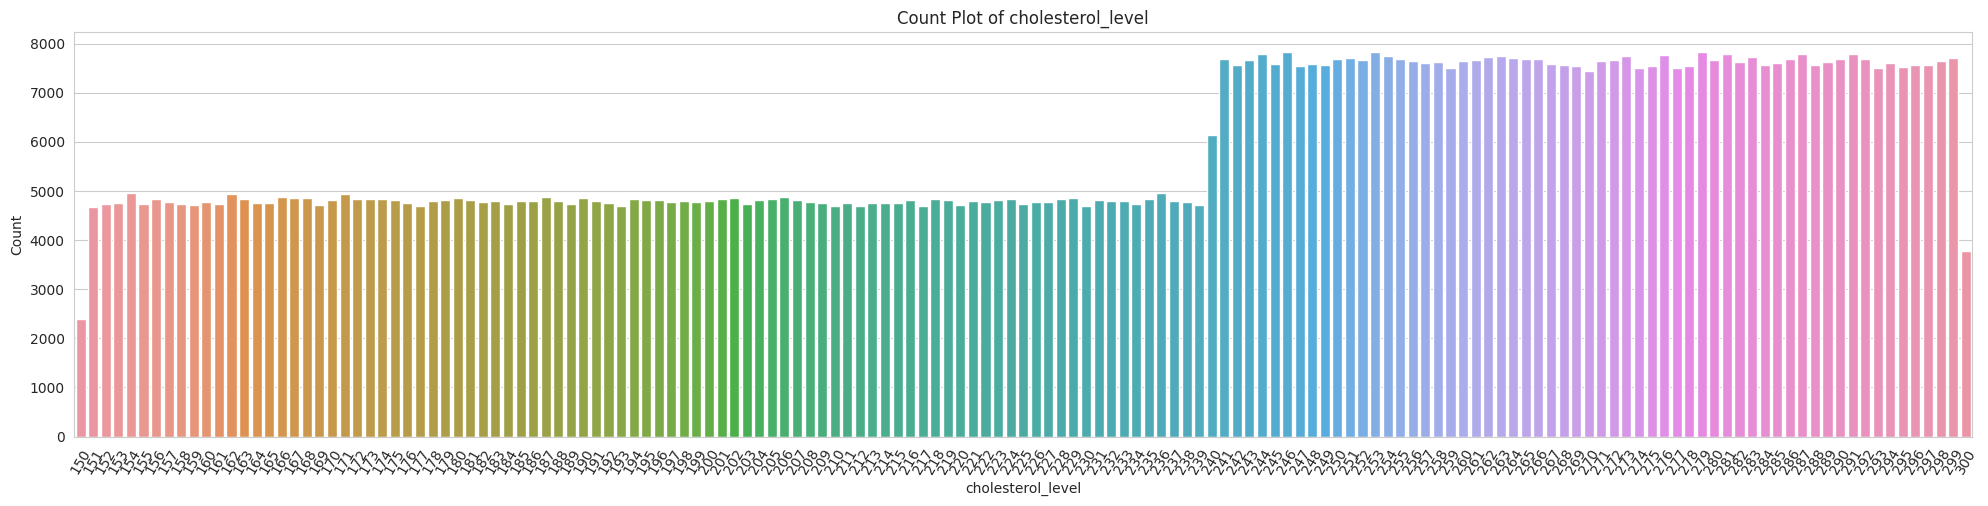

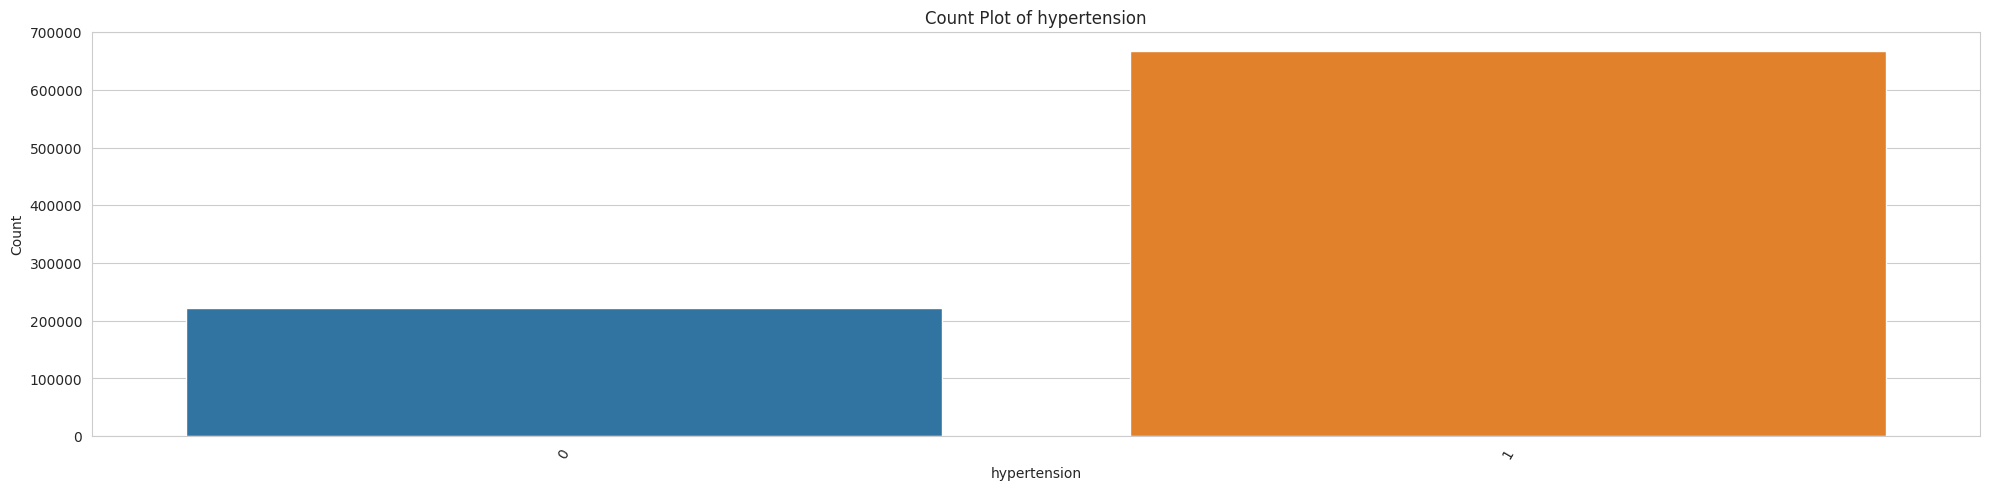

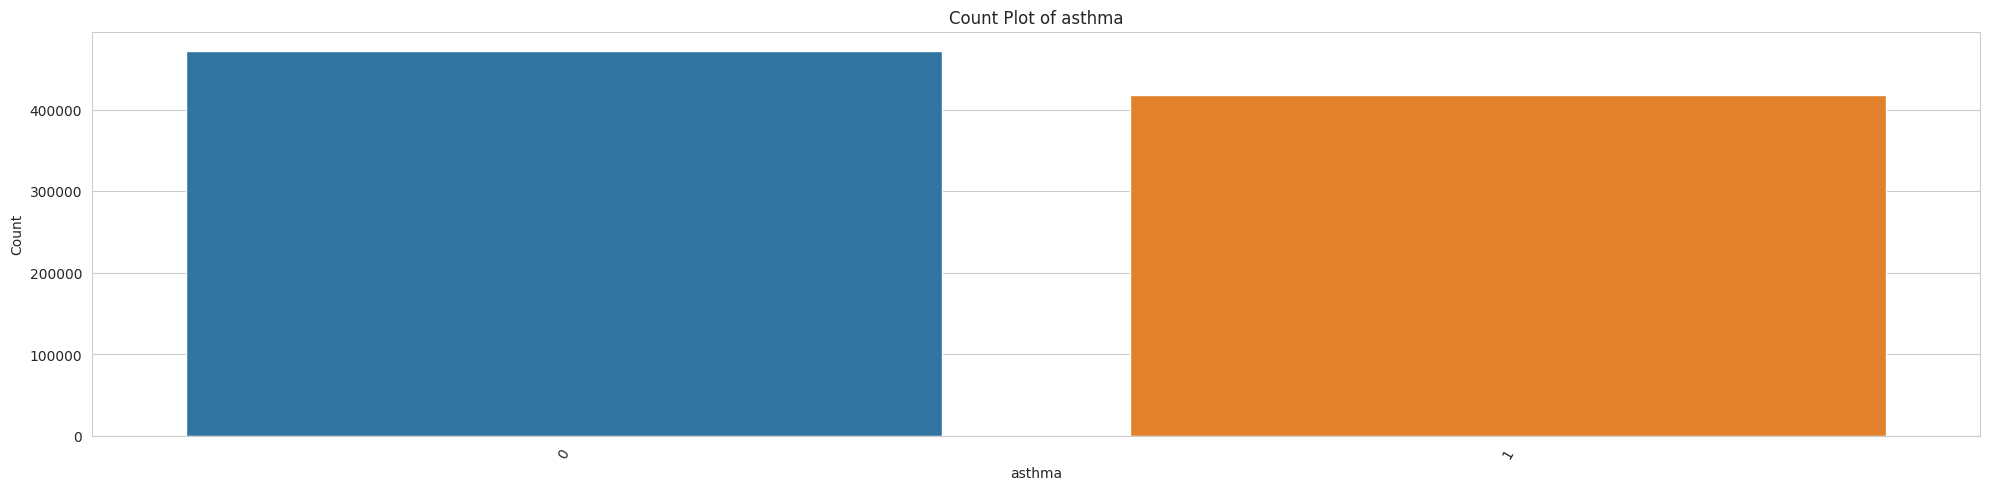

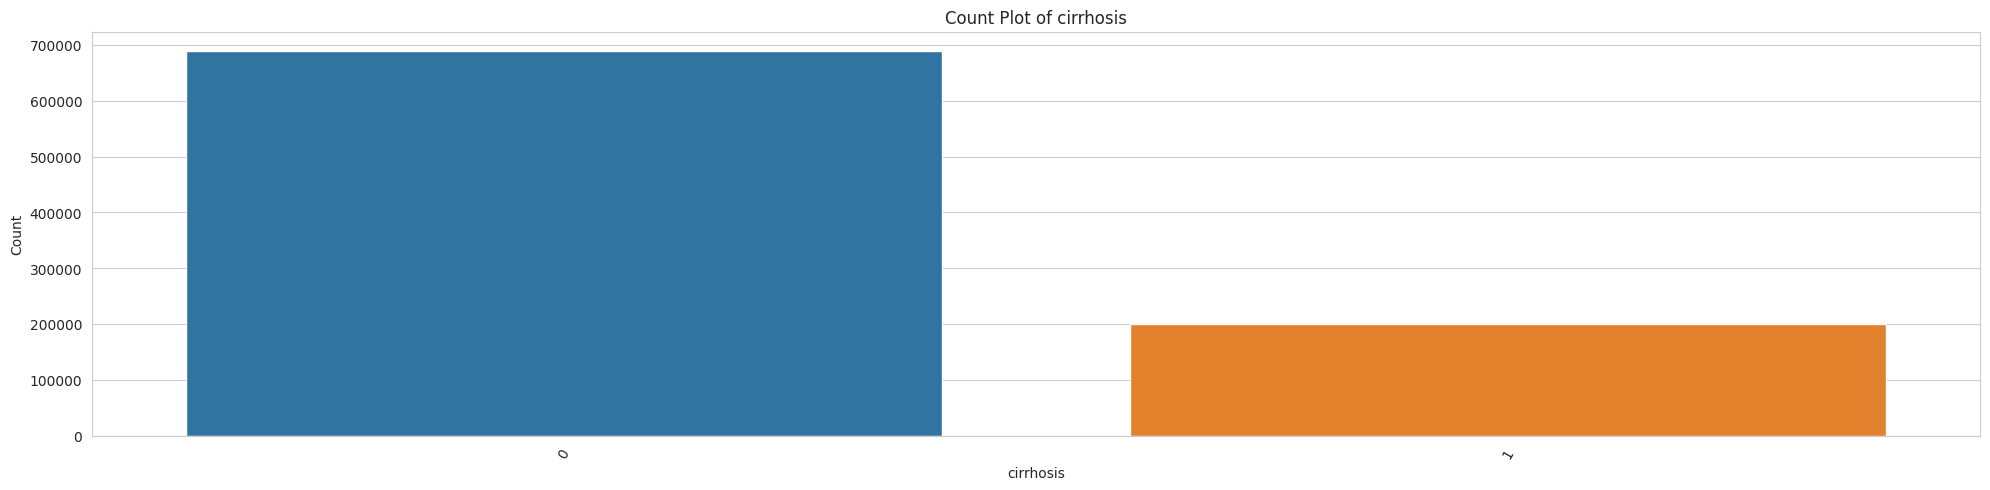

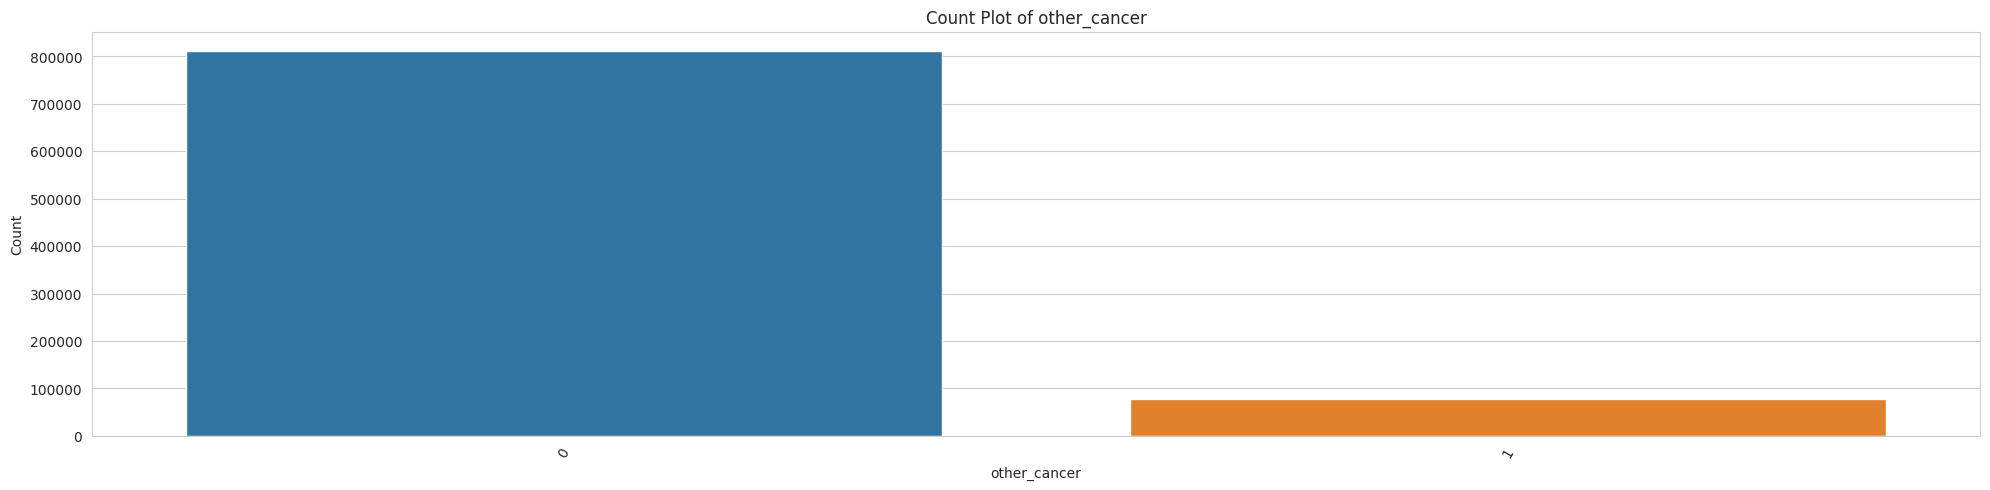

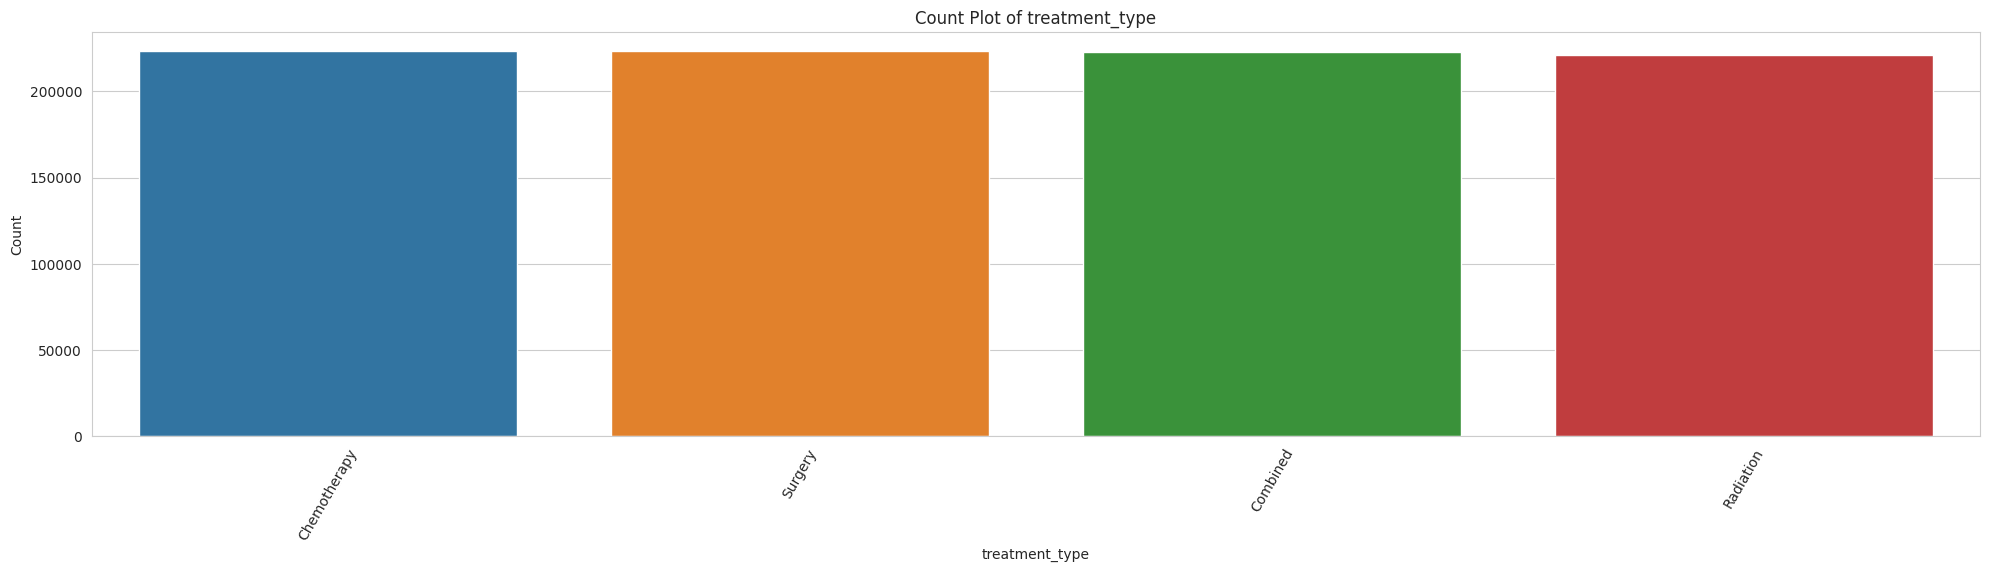

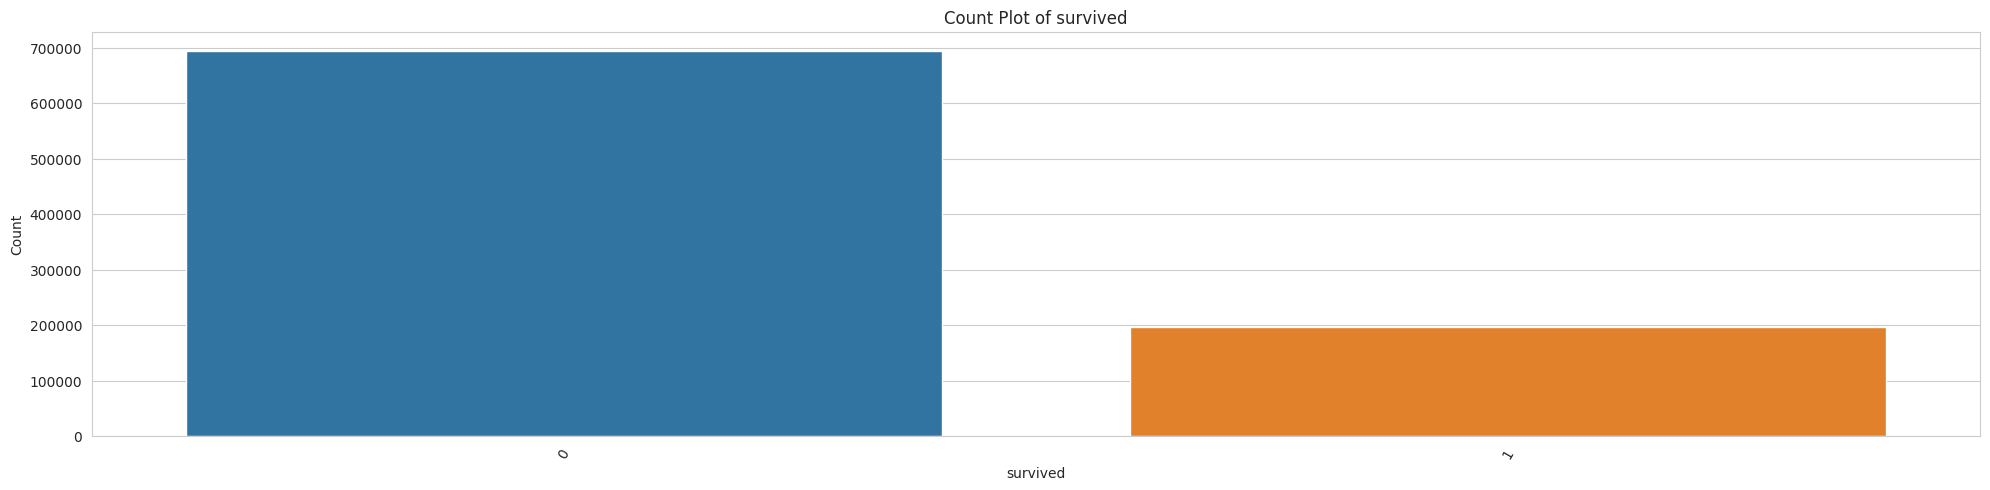

In [10]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(20,5))
        sns.countplot(x=features,data = df)
        plt.title(f'Count Plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.xticks(rotation=60)
        plt.show()

# KDE PLOT

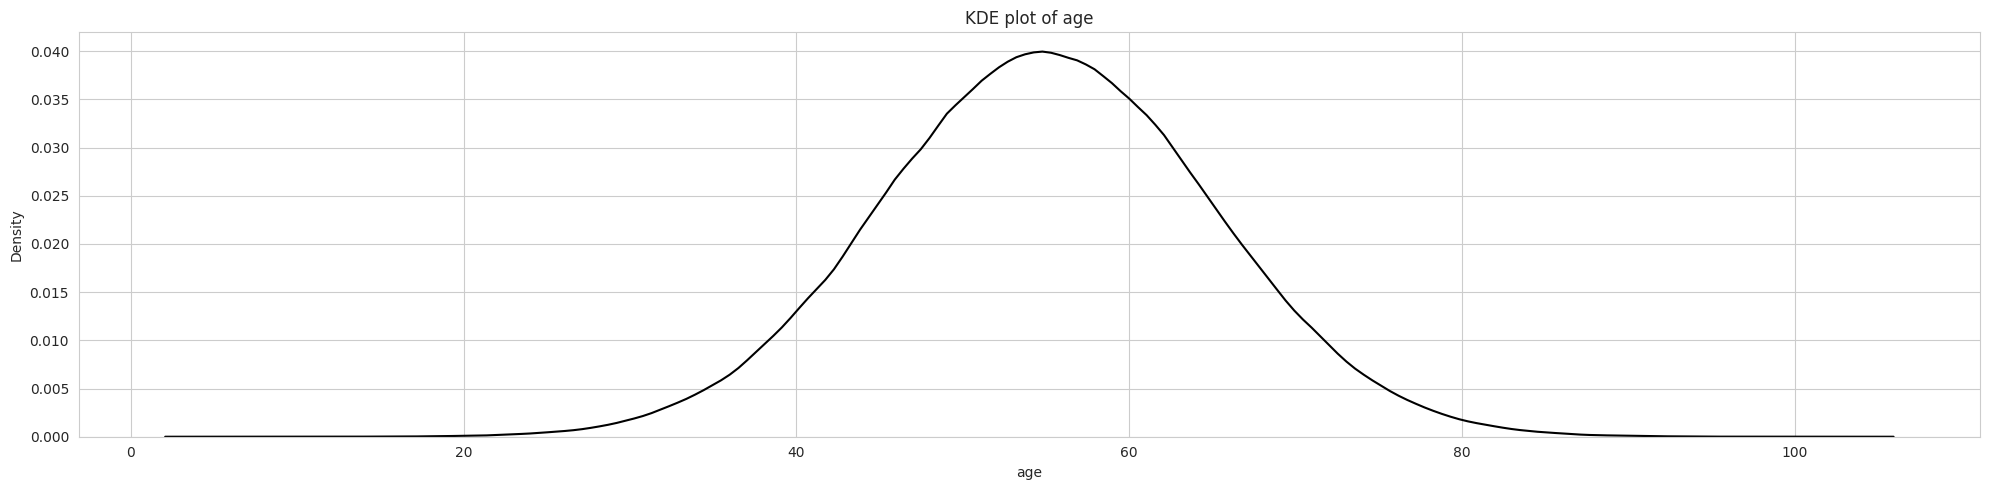

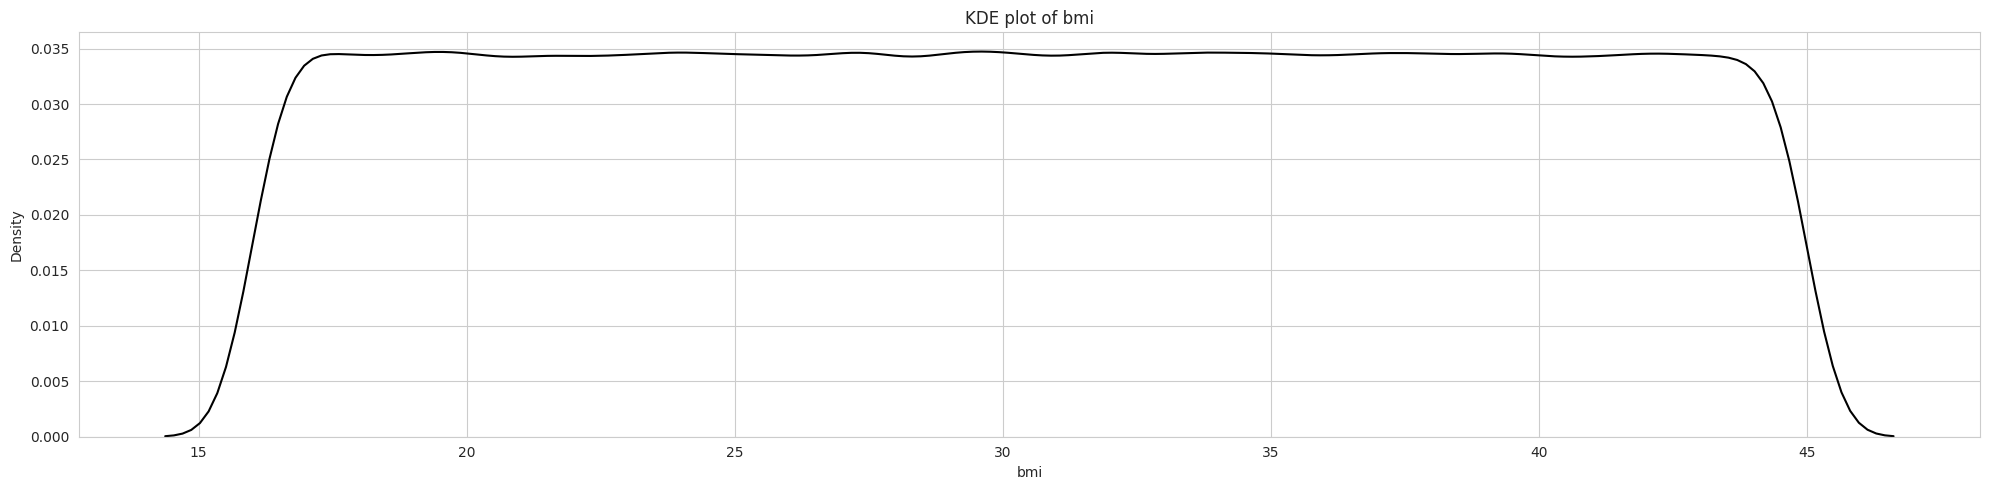

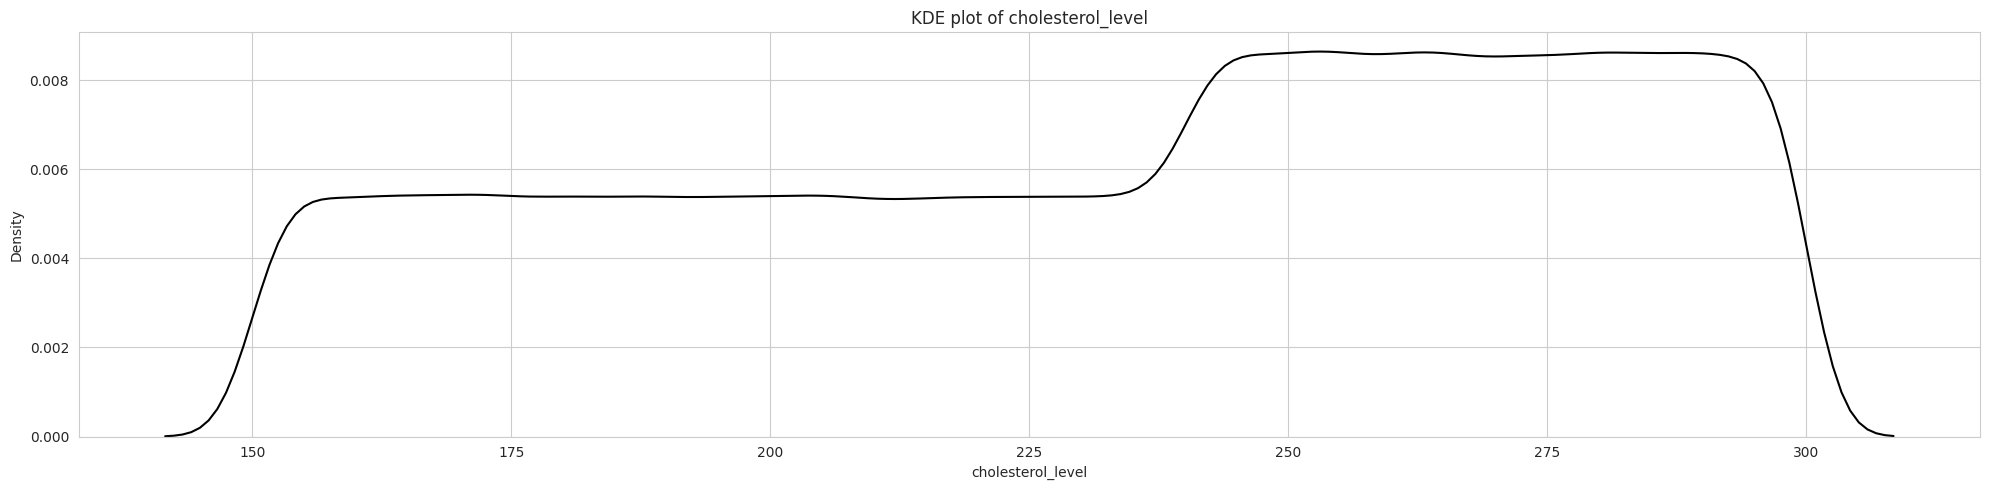

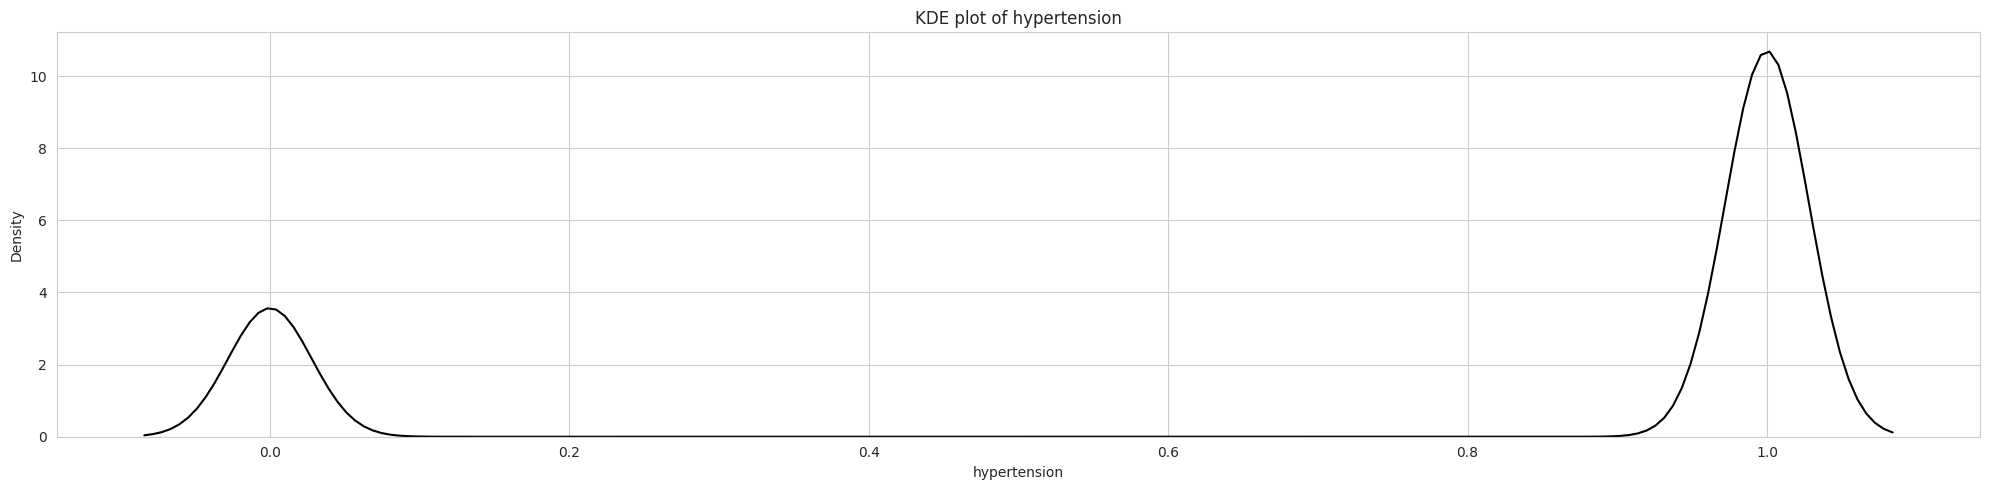

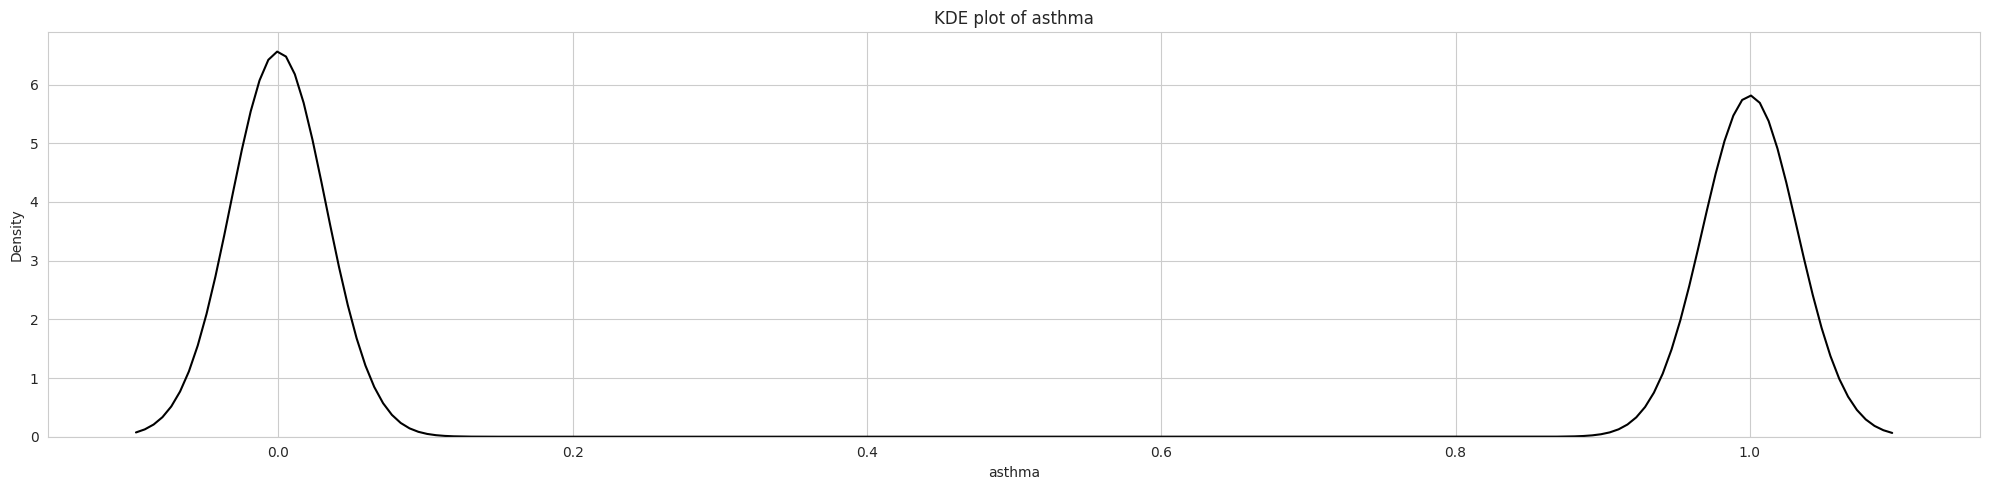

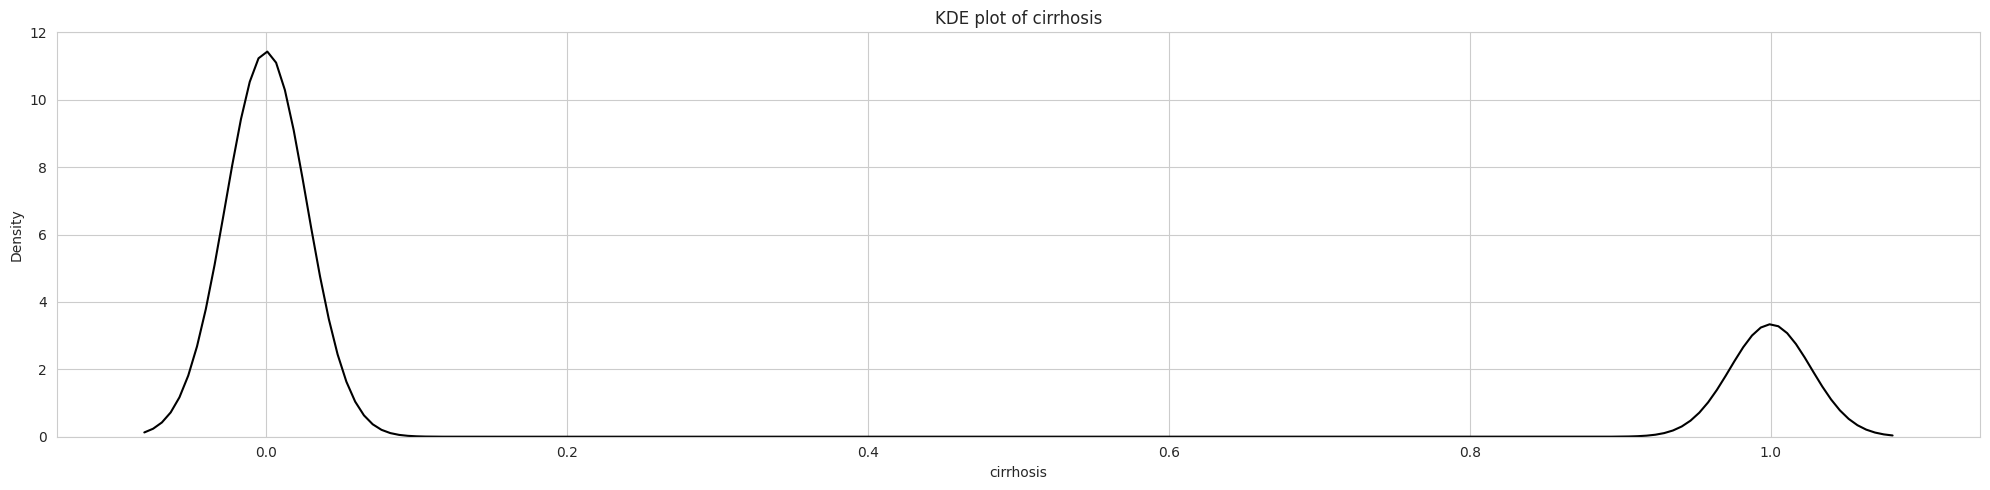

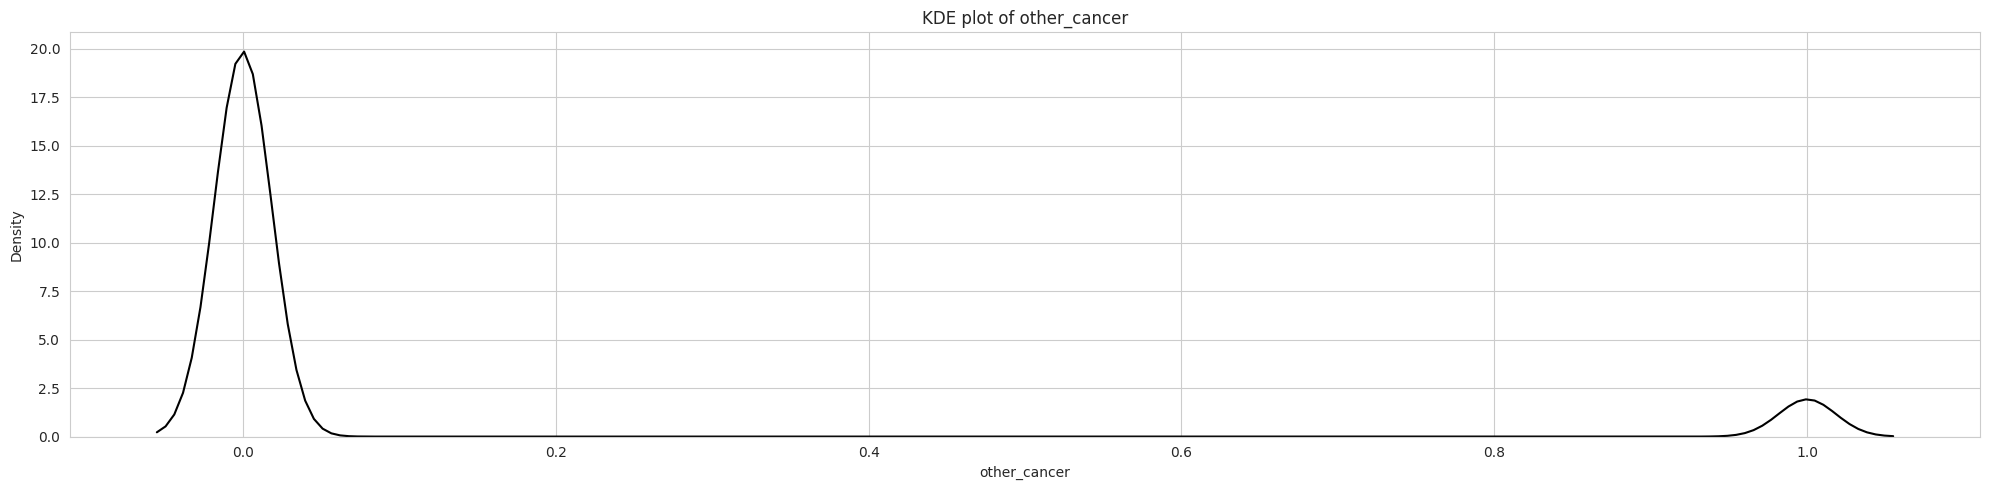

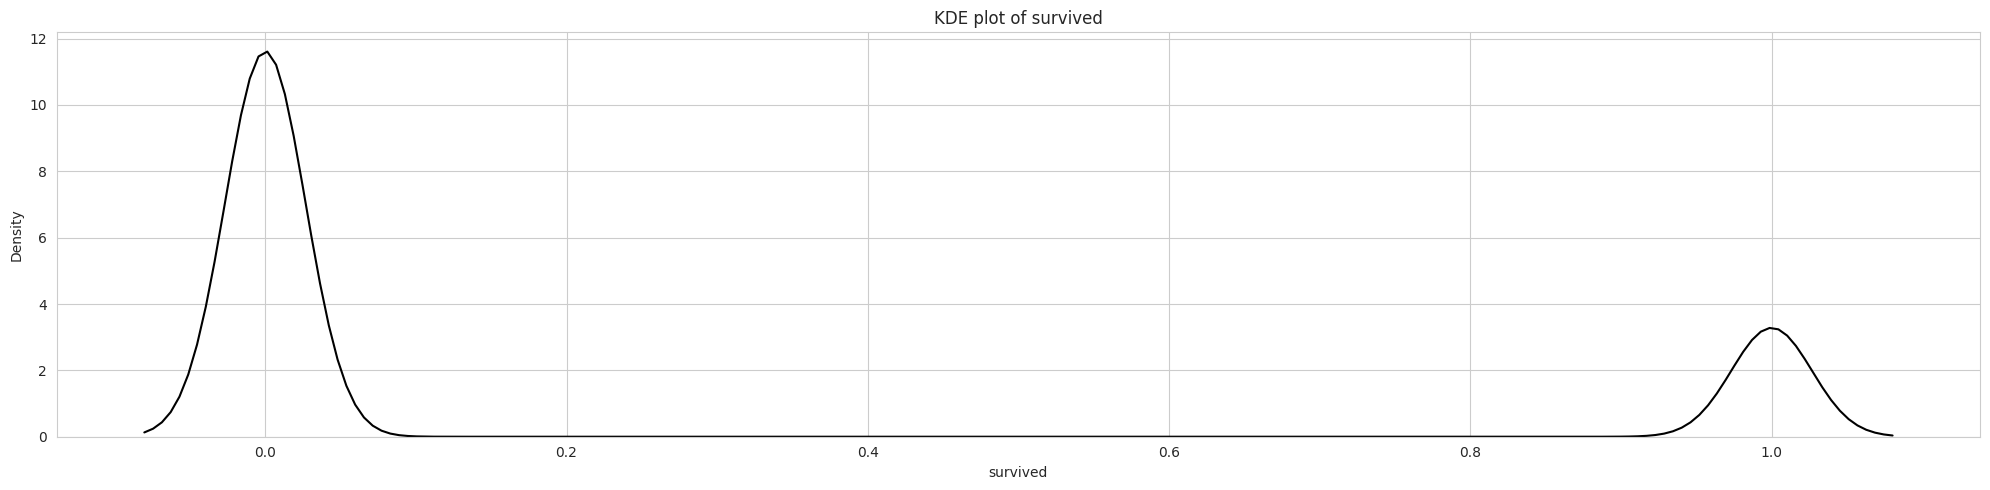

In [11]:
for features in cols:
    if features in df.columns and pd.api.types.is_numeric_dtype(df[features]):
        plt.figure(figsize=(20,5))
        sns.kdeplot(df[features].dropna(),color='black')
        plt.title(f'KDE plot of {features}')
        plt.xlabel(features)
        plt.tight_layout()
        plt.show()

# Feature Engineering

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [13]:
lab_cols = ['gender', 'country', 'cancer_stage',
       'family_history', 'smoking_status','treatment_type', 'survived']

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
for column in lab_cols:
    df[column] = le.fit_transform(df[column])

In [17]:
df

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,1,26,2016-04-05,0,1,3,29.4,199,0,0,1,0,0,2017-09-10,0
1,2,50.0,0,19,2023-04-20,2,1,3,41.2,280,1,1,0,0,3,2024-06-17,1
2,3,65.0,0,12,2023-04-05,2,1,1,44.0,268,1,1,0,0,1,2024-04-09,0
3,4,51.0,0,1,2016-02-05,0,0,3,43.0,241,1,1,0,0,0,2017-04-23,0
4,5,37.0,1,17,2023-11-29,0,0,3,19.7,178,0,0,0,0,1,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,1,18,2022-07-01,3,0,3,44.8,243,1,1,1,0,2,2023-02-23,0
889996,889997,62.0,0,4,2015-09-27,1,1,1,21.6,240,0,0,0,0,3,2017-06-19,0
889997,889998,48.0,0,7,2016-03-27,2,1,2,38.6,242,1,0,0,0,1,2017-01-23,1
889998,889999,67.0,0,23,2015-12-22,3,1,1,18.6,194,1,1,0,0,0,2017-12-12,0


# CORRELATION MATRIX

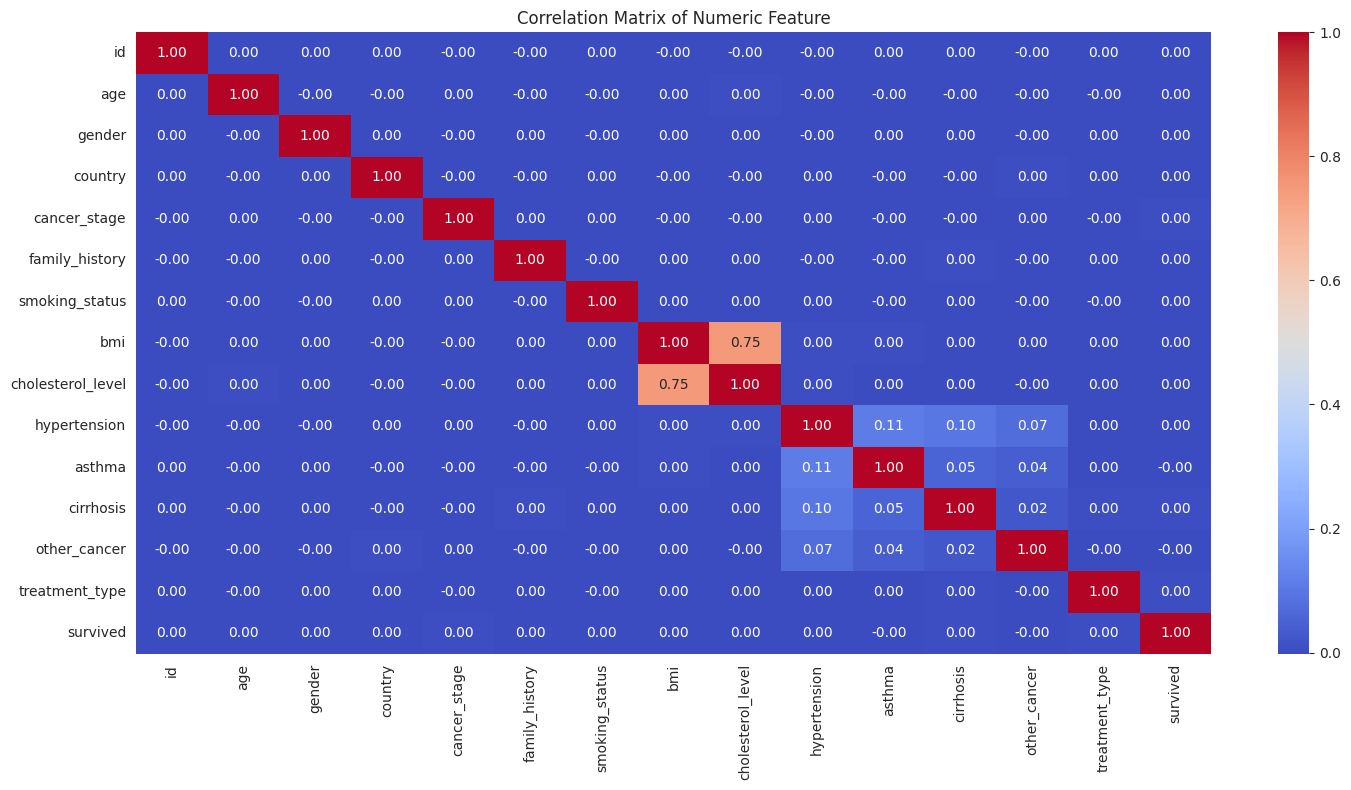

In [18]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[0] >= 4:
    plt.figure(figsize=(15,8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title(f'Correlation Matrix of Numeric Feature')
    plt.tight_layout()
    plt.show()


# MODEL SECTION

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,f1_score,mean_absolute_error,mean_squared_error,recall_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

2025-05-31 14:57:07.623721: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748703427.838265      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748703427.903534      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
X = df.drop(columns=['id','diagnosis_date','end_treatment_date','survived'])
y = df['survived']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Use '1' for regression; for binary classification, use activation='sigmoid'

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)
y_pred1 = model.predict(X_test_scaled).flatten()  # Flatten to get 1D array

y_pred_binary = (y_pred1 > 0.5).astype(int)


Epoch 1/10


2025-05-31 14:57:21.235057: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


20025/20025 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.7797 - loss: 3.5504 - val_accuracy: 0.7782 - val_loss: 3.5752
Epoch 2/10
20025/20025 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.7801 - loss: 3.5437 - val_accuracy: 0.7782 - val_loss: 3.5752
Epoch 3/10
20025/20025 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.7805 - loss: 3.5382 - val_accuracy: 0.7782 - val_loss: 3.5752
Epoch 4/10
20025/20025 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.7812 - loss: 3.5273 - val_accuracy: 0.7782 - val_loss: 3.5752
Epoch 5/10
20025/20025 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.7807 - loss: 3.5342 - val_accuracy: 0.7782 - val_loss: 3.5752
Epoch 6/10
20025/20025 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.7798 - loss: 3.5492 - val_accuracy: 0.7782 - val_loss: 3.5752
Epoch 7/10
20025/20025 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.7797 - loss: 3.5508 - val_accuracy: 0.7782 - val_loss: 3.5752
Epoch 8/10
20025/20025 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.7794 - lo

In [24]:
acc1 = accuracy_score(y_test, y_pred_binary)
r2_ = r2_score(y_test, y_pred1)
mse_ = mean_squared_error(y_test, y_pred1)
rmse_ = np.sqrt(mse_)
mae_ = mean_absolute_error(y_test, y_pred1)

print(f"Accuracy: {acc1}")
print(f"R2 Score: {r2_}")
print(f"MSE: {mse_}")
print(f"RMSE: {rmse_}")
print(f"MAE: {mae_}")


Accuracy: 0.7788707865168539
R2 Score: -11.148095429995934
MSE: 2.0922796496366076
RMSE: 1.4464714479161376
MAE: 1.3596105319941312
